# 2 ЧАСТЬ

## ОПИСАНИЕ

**Проверка гипотез на выбранном датасете:**
- получить соответствующих датасетов путем парсинга/работы с API;
- осуществить этапы первичного анализа данных (EDA);
  - разобраться в данных, изучить их природу
  - выявить реальные зависимости
  - найти закономерности
- определить не менее трех содержательных гипотез на основе проделанного EDA; (превратить закономерности их в осмысленные статистические гипотезы для проверки)
-  проверить гипотезы с помощью различнных статистических тестов и обосновать выбор
- провести сравнительный анализ нескольких тестов друг с другом хотя бы для одной гипотезы,
- провести осмысленную интерпретацию проделанного анализа в контексте реальной исследовательской задачи
-  показать, почему эти находки важны для бизнеса или для выбранного контекста датасета, выявить инсайты для бизнеса

 В любом случае, используемый вами датасет должен (до этапа EDA) содержать **не менее 2000 строк** и **не менее 8 признаков**.

Используйте разные подходы к проверке гипотез. Ищите способы усилить ваши тесты. Применяйте новые методы и идеи, а затем рассказывайте про них нам. Не бойтесь эксперементировать! Это будет только поощряться :)

не просто провести тесты и сделать какие-то выводы из них, но разобраться в данных, изучить их природу, выявить реальные зависимости, найти закономерности и превратить их в осмысленные статистические гипотезы для проверки и инсайты, а также на основе проделанного анализа показать, почему эти находки важны для бизнеса или для выбранного контекста датасета

## КРИТЕРИИ

**макс 3**

По 1 критерию можно получить 1 балл и выше только при условии осмысленного осуществления этапа **EDA** и наличия **3 гипотез**, напрямую логически вытекающих из этого этапа.

**макс 3.5**

По 2 критерию можно получить 3 балла и выше только при условии проведения **сравнительного анализа нескольких тестов** друг с другом хотя бы для одной гипотезы, а также осмысленной интерпретации проделанного анализа в контексте реальной исследовательской задачи, также полностью **обоснованного (и правильного) выбора** каждого из используемых статистических тестов.

# Начало работы

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import re

## EDA

### Скачиваем

первый

In [5]:
df1 = pd.read_csv("processedRestaurants максим.csv")
df1

name                                               link  \
0                  Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1            Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2     Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3                  Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4                 АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   
...                    ...                                                ...   
2350           China Today  https://yandex.com/maps/org/china_today/113703...   
2351             Кофемания  https://yandex.com/maps/org/coffeemania/102595...   
2352             Кофемания  https://yandex.com/maps/org/coffeemania/104660...   
2353             Кофемания  https://yandex.com/maps/org/coffeemania/106931...   
2354             Кофемания  https://yandex.com/maps/org/coffeemania/107517...   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
2       12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3          Выходной    18:00–05:00    18:00–05:00    18:00–05:00   
4       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
...             ...            ...            ...            ...   
2350    12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00   
2351    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
2352  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
2353  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
2354  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   

              friWT          satWT          sunWT     avgBill  ...  \
0       10:00–23:00    10:00–23:00    10:00–23:00     700-900  ...   
1       10:00–23:00    10:00–23:00    10:00–23:00    600-2000  ...   
2       12:00–00:00    12:00–00:00    12:00–00:00        2500  ...   
3       18:00–05:00    18:00–05:00    18:00–05:00  2500-10000  ...   
4       09:00–22:00    09:00–23:00    09:00–23:00   1500-2500  ...   
...             ...            ...            ...         ...  ...   
2350    12:00–23:00    12:00–23:00    12:00–23:00   1500-2500  ...   
2351    10:00–22:00    10:00–22:00    10:00–22:00   1500-2500  ...   
2352  Круглосуточно  Круглосуточно  Круглосуточно   1500-2500  ...   
2353  Круглосуточно  Круглосуточно  Круглосуточно   1500-2500  ...   
2354  Круглосуточно  Круглосуточно  Круглосуточно   1500-2500  ...   

               metro  photoAmount menuPositions reviewsAmount  \
0         Смоленская        533.0             0        1280.0   
1             Динамо        147.0           114         699.0   
2     Воробьёвы горы        592.0            45        1028.0   
3      Кропоткинская         90.0             0          58.0   
4      Парк культуры        505.0             4        2982.0   
...              ...          ...           ...           ...   
2350      Кунцевская         62.0           101         145.0   
2351     Театральная        131.0            98         246.0   
2352     Баррикадная        221.0           127         919.0   
2353     Белорусская        332.0           136        1824.0   
2354         Трубная        320.0           126        1722.0   

                                                cuisine  tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...           5–6   
1     европейская, итальянская, авторская, морская, ...         26–38   
2     европейская, итальянская, паназиатская, авторс...          1–50   
3     европейская, паназиатская, русская, японская, ...         до 10   
4     европейская, итальянская, русская, авторская, ...         от 40   
...                                                 ...           ...   
2350  китайская, японская, авторская, средиземноморс...           NaN   
2351  европейская, америка

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2160 non-null   object 
 1   link               2355 non-null   object 
 2   monWT              1996 non-null   object 
 3   tueWT              1996 non-null   object 
 4   wedWT              1996 non-null   object 
 5   thuWT              1996 non-null   object 
 6   friWT              1996 non-null   object 
 7   satWT              1996 non-null   object 
 8   sunWT              1996 non-null   object 
 9   avgBill            1589 non-null   object 
 10  rating             2080 non-null   float64
 11  rateAmount         2293 non-null   float64
 12  address            2156 non-null   object 
 13  distMetro          2118 non-null   object 
 14  metro              2118 non-null   object 
 15  photoAmount        2284 non-null   float64
 16  menuPositions      2355 

In [7]:
df1 = df1[~df1['name'].isna()]
df1

name                                               link  \
0                  Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1            Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2     Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3                  Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4                 АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   
...                    ...                                                ...   
2350           China Today  https://yandex.com/maps/org/china_today/113703...   
2351             Кофемания  https://yandex.com/maps/org/coffeemania/102595...   
2352             Кофемания  https://yandex.com/maps/org/coffeemania/104660...   
2353             Кофемания  https://yandex.com/maps/org/coffeemania/106931...   
2354             Кофемания  https://yandex.com/maps/org/coffeemania/107517...   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
2       12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3          Выходной    18:00–05:00    18:00–05:00    18:00–05:00   
4       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
...             ...            ...            ...            ...   
2350    12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00   
2351    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
2352  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
2353  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
2354  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   

              friWT          satWT          sunWT     avgBill  ...  \
0       10:00–23:00    10:00–23:00    10:00–23:00     700-900  ...   
1       10:00–23:00    10:00–23:00    10:00–23:00    600-2000  ...   
2       12:00–00:00    12:00–00:00    12:00–00:00        2500  ...   
3       18:00–05:00    18:00–05:00    18:00–05:00  2500-10000  ...   
4       09:00–22:00    09:00–23:00    09:00–23:00   1500-2500  ...   
...             ...            ...            ...         ...  ...   
2350    12:00–23:00    12:00–23:00    12:00–23:00   1500-2500  ...   
2351    10:00–22:00    10:00–22:00    10:00–22:00   1500-2500  ...   
2352  Круглосуточно  Круглосуточно  Круглосуточно   1500-2500  ...   
2353  Круглосуточно  Круглосуточно  Круглосуточно   1500-2500  ...   
2354  Круглосуточно  Круглосуточно  Круглосуточно   1500-2500  ...   

               metro  photoAmount menuPositions reviewsAmount  \
0         Смоленская        533.0             0        1280.0   
1             Динамо        147.0           114         699.0   
2     Воробьёвы горы        592.0            45        1028.0   
3      Кропоткинская         90.0             0          58.0   
4      Парк культуры        505.0             4        2982.0   
...              ...          ...           ...           ...   
2350      Кунцевская         62.0           101         145.0   
2351     Театральная        131.0            98         246.0   
2352     Баррикадная        221.0           127         919.0   
2353     Белорусская        332.0           136        1824.0   
2354         Трубная        320.0           126        1722.0   

                                                cuisine  tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...           5–6   
1     европейская, итальянская, авторская, морская, ...         26–38   
2     европейская, итальянская, паназиатская, авторс...          1–50   
3     европейская, паназиатская, русская, японская, ...         до 10   
4     европейская, итальянская, русская, авторская, ...         от 40   
...                                                 ...           ...   
2350  китайская, японская, авторская, средиземноморс...           NaN   
2351  европейская, америка

второй

In [8]:
df2 = pd.read_csv("processedRestaurants маша.csv")
df2

name                                               link  \
0           Кофемания  https://yandex.com/maps/org/coffeemania/111682...   
1           Кофемания  https://yandex.com/maps/org/coffeemania/175534...   
2           Куршевель  https://yandex.com/maps/org/courchevel/1019799...   
3               Dacha     https://yandex.com/maps/org/dacha/60462302103/   
4            Davidoff  https://yandex.com/maps/org/davidoff/243289398...   
...               ...                                                ...   
2351  Я люблю хинкали  https://yandex.ru/maps/org/ya_lyublyu_khinkali...   
2352   Я люблю шашлык  https://yandex.ru/maps/org/ya_lyublyu_shashlyk...   
2353         Якитория  https://yandex.ru/maps/org/yakitoriya/19407188...   
2354           Якудза    https://yandex.ru/maps/org/yakudza/15236861405/   
2355       Южная ночь  https://yandex.ru/maps/org/yuzhnaya_noch/69639...   

            monWT        tueWT        wedWT        thuWT        friWT  \
0     08:00–00:00  08:00–00:00  08:00–00:00  08:00–00:00  08:00–00:00   
1     08:00–22:00  08:00–22:00  08:00–22:00  08:00–22:00  08:00–22:00   
2     21:00–06:00  21:00–06:00  21:00–06:00  21:00–06:00  21:00–06:00   
3     11:00–23:00  11:00–23:00  11:00–23:00  11:00–23:00  11:00–00:00   
4     11:00–00:00  11:00–00:00  11:00–00:00  11:00–00:00  11:00–00:00   
...           ...          ...          ...          ...          ...   
2351  11:00–22:00  11:00–22:00  11:00–22:00  11:00–22:00  11:00–22:00   
2352  09:00–23:00  09:00–23:00  09:00–23:00  09:00–23:00  09:00–23:00   
2353  10:00–05:00  10:00–05:00  10:00–05:00  10:00–05:00  10:00–05:00   
2354          NaN          NaN          NaN          NaN          NaN   
2355  09:00–00:00  09:00–00:00  09:00–00:00  09:00–00:00  09:00–00:00   

            satWT        sunWT    avgBill  ...         metro  photoAmount  \
0     08:00–00:00  08:00–00:00  1500-2500  ...    Смоленская        203.0   
1     09:00–22:00  09:00–22:00  1500-2500  ...   Хорошёвская         65.0   
2     21:00–06:00  21:00–06:00        NaN  ...   Театральная        158.0   
3     11:00–00:00  11:00–23:00  1500-2300  ...           NaN        378.0   
4     11:00–00:00  11:00–00:00  2000-2000  ...    Пушкинская         28.0   
...           ...          ...        ...  ...           ...          ...   
2351  11:00–22:00  11:00–22:00        NaN  ...      Царицыно         27.0   
2352  09:00–23:00  09:00–23:00    250-500  ...      Пражская         77.0   
2353  10:00–05:00  10:00–05:00       1500  ...  Чертановская        182.0   
2354          NaN          NaN        NaN  ...         Южная          NaN   
2355  09:00–00:00  09:00–00:00   500-1500  ...      Пражская        136.0   

     menuPositions reviewsAmount  \
0              122        1049.0   
1              119         364.0   
2                3         225.0   
3              114        1102.0   
4                0         165.0   
...            ...           ...   
2351           106          67.0   
2352            42         148.0   
2353           254        1470.0   
2354            73           NaN   
2355             0           2.0   

                                                cuisine  tablesAmount  \
0     европейская, американская, русская, авторская,...           NaN   
1     европейская, американская, итальянская, русска...           NaN   
2     европейская, итальянская, паназиатская, русска...             8   
3                                             смешанная         19–26   
4                                           итальянская           NaN   
...                                                 ...           ...   
2351                                                NaN           NaN   
2352                                             шашлык           NaN   
2353  европейская, паназиатская, японская, авторская...           NaN   
2354                                                NaN           NaN   
2355  кавказская, европейская, шашлык, узбекская, гр...           

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2354 non-null   object 
 1   link               2356 non-null   object 
 2   monWT              2117 non-null   object 
 3   tueWT              2117 non-null   object 
 4   wedWT              2117 non-null   object 
 5   thuWT              2117 non-null   object 
 6   friWT              2117 non-null   object 
 7   satWT              2117 non-null   object 
 8   sunWT              2117 non-null   object 
 9   avgBill            1436 non-null   object 
 10  rating             2217 non-null   float64
 11  rateAmount         2255 non-null   float64
 12  address            2346 non-null   object 
 13  distMetro          2271 non-null   object 
 14  metro              2271 non-null   object 
 15  photoAmount        2239 non-null   float64
 16  menuPositions      2356 

In [10]:
df2 = df2[~df2['name'].isna()]
df2

name                                               link  \
0           Кофемания  https://yandex.com/maps/org/coffeemania/111682...   
1           Кофемания  https://yandex.com/maps/org/coffeemania/175534...   
2           Куршевель  https://yandex.com/maps/org/courchevel/1019799...   
3               Dacha     https://yandex.com/maps/org/dacha/60462302103/   
4            Davidoff  https://yandex.com/maps/org/davidoff/243289398...   
...               ...                                                ...   
2351  Я люблю хинкали  https://yandex.ru/maps/org/ya_lyublyu_khinkali...   
2352   Я люблю шашлык  https://yandex.ru/maps/org/ya_lyublyu_shashlyk...   
2353         Якитория  https://yandex.ru/maps/org/yakitoriya/19407188...   
2354           Якудза    https://yandex.ru/maps/org/yakudza/15236861405/   
2355       Южная ночь  https://yandex.ru/maps/org/yuzhnaya_noch/69639...   

            monWT        tueWT        wedWT        thuWT        friWT  \
0     08:00–00:00  08:00–00:00  08:00–00:00  08:00–00:00  08:00–00:00   
1     08:00–22:00  08:00–22:00  08:00–22:00  08:00–22:00  08:00–22:00   
2     21:00–06:00  21:00–06:00  21:00–06:00  21:00–06:00  21:00–06:00   
3     11:00–23:00  11:00–23:00  11:00–23:00  11:00–23:00  11:00–00:00   
4     11:00–00:00  11:00–00:00  11:00–00:00  11:00–00:00  11:00–00:00   
...           ...          ...          ...          ...          ...   
2351  11:00–22:00  11:00–22:00  11:00–22:00  11:00–22:00  11:00–22:00   
2352  09:00–23:00  09:00–23:00  09:00–23:00  09:00–23:00  09:00–23:00   
2353  10:00–05:00  10:00–05:00  10:00–05:00  10:00–05:00  10:00–05:00   
2354          NaN          NaN          NaN          NaN          NaN   
2355  09:00–00:00  09:00–00:00  09:00–00:00  09:00–00:00  09:00–00:00   

            satWT        sunWT    avgBill  ...         metro  photoAmount  \
0     08:00–00:00  08:00–00:00  1500-2500  ...    Смоленская        203.0   
1     09:00–22:00  09:00–22:00  1500-2500  ...   Хорошёвская         65.0   
2     21:00–06:00  21:00–06:00        NaN  ...   Театральная        158.0   
3     11:00–00:00  11:00–23:00  1500-2300  ...           NaN        378.0   
4     11:00–00:00  11:00–00:00  2000-2000  ...    Пушкинская         28.0   
...           ...          ...        ...  ...           ...          ...   
2351  11:00–22:00  11:00–22:00        NaN  ...      Царицыно         27.0   
2352  09:00–23:00  09:00–23:00    250-500  ...      Пражская         77.0   
2353  10:00–05:00  10:00–05:00       1500  ...  Чертановская        182.0   
2354          NaN          NaN        NaN  ...         Южная          NaN   
2355  09:00–00:00  09:00–00:00   500-1500  ...      Пражская        136.0   

     menuPositions reviewsAmount  \
0              122        1049.0   
1              119         364.0   
2                3         225.0   
3              114        1102.0   
4                0         165.0   
...            ...           ...   
2351           106          67.0   
2352            42         148.0   
2353           254        1470.0   
2354            73           NaN   
2355             0           2.0   

                                                cuisine  tablesAmount  \
0     европейская, американская, русская, авторская,...           NaN   
1     европейская, американская, итальянская, русска...           NaN   
2     европейская, итальянская, паназиатская, русска...             8   
3                                             смешанная         19–26   
4                                           итальянская           NaN   
...                                                 ...           ...   
2351                                                NaN           NaN   
2352                                             шашлык           NaN   
2353  европейская, паназиатская, японская, авторская...           NaN   
2354                                                NaN           NaN   
2355  кавказская, европейская, шашлык, узбекская, гр...           

третий

In [11]:
df3 = pd.read_csv("processedRestaurants максим2.csv")
df3

name                                               link  \
0                Valenok    https://yandex.ru/maps/org/valenok/27250881744/   
1            Вилла Паста  https://yandex.ru/maps/org/villa_pasta/6496580...   
2           White Rabbit  https://yandex.ru/maps/org/white_rabbit/128151...   
3               Якитория  https://yandex.ru/maps/org/yakitoriya/1036925557/   
4               Якитория  https://yandex.ru/maps/org/yakitoriya/1236348638/   
..                   ...                                                ...   
192  Раменский Деликатес  https://yandex.ru/maps/org/ramenskiy_delikates...   
193                Ранчо      https://yandex.ru/maps/org/rancho/1310346434/   
194     Сербский Роштиль  https://yandex.ru/maps/org/serbskiy_roshtil/11...   
195               Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
196             Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

             monWT          tueWT          wedWT          thuWT  \
0      12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
1    Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
2      12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3      10:00–00:00    10:00–00:00    10:00–00:00    10:00–00:00   
4      10:00–00:00    10:00–00:00    10:00–00:00    10:00–00:00   
..             ...            ...            ...            ...   
192    09:00–21:00    09:00–21:00    09:00–21:00    09:00–21:00   
193    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
194    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
195  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
196    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

             friWT          satWT          sunWT     avgBill  ...  \
0      12:00–02:00    12:00–00:00    12:00–00:00   1500-3000  ...   
1    Круглосуточно  Круглосуточно  Круглосуточно   1500-2000  ...   
2      12:00–00:00    12:00–00:00    12:00–00:00  9000-10000  ...   
3      10:00–00:00    10:00–00:00    10:00–00:00        1500  ...   
4      10:00–00:00    10:00–00:00    10:00–00:00        1500  ...   
..             ...            ...            ...         ...  ...   
192    09:00–21:00    09:00–21:00    09:00–21:00         NaN  ...   
193    10:00–22:00    10:00–22:00    10:00–22:00         NaN  ...   
194    10:00–23:00    10:00–23:00    10:00–22:00         NaN  ...   
195  Круглосуточно  Круглосуточно  Круглосуточно     500-800  ...   
196    12:00–05:00    12:00–05:00    12:00–03:00        2500  ...   

               metro  photoAmount menuPositions reviewsAmount  \
0    Цветной бульвар        715.0            33        4493.0   
1         Пушкинская        484.0           166        2076.0   
2         Смоленская        576.0             0        6609.0   
3        Новогиреево        269.0           253        1451.0   
4       Первомайская        254.0           256        1420.0   
..               ...          ...           ...           ...   
192     Стахановская         16.0             0          23.0   
193       Новокосино        109.0            89         305.0   
194       Щёлковская         31.0            33          21.0   
195             ЦСКА         74.0            75          46.0   
196  Улица 1905 года        114.0            85        1658.0   

                                               cuisine  tablesAmount  \
0                  авторская, международная, смешанная           NaN   
1    европейская, китайская, итальянская, авторская...          5–30   
2                                   русская, авторская           NaN   
3    европейская, паназиатская, японская, авторская...           NaN   
4    европейская, паназиатская, японская, авторская...           NaN   
..                                                 ...           ...   
192                                                NaN           NaN   
193  европейская, американская, латиноамериканская,...          1–25   
194     

In [12]:
df3 = df3[~df3['name'].isna()]
df3

name                                               link  \
0                Valenok    https://yandex.ru/maps/org/valenok/27250881744/   
1            Вилла Паста  https://yandex.ru/maps/org/villa_pasta/6496580...   
2           White Rabbit  https://yandex.ru/maps/org/white_rabbit/128151...   
3               Якитория  https://yandex.ru/maps/org/yakitoriya/1036925557/   
4               Якитория  https://yandex.ru/maps/org/yakitoriya/1236348638/   
..                   ...                                                ...   
192  Раменский Деликатес  https://yandex.ru/maps/org/ramenskiy_delikates...   
193                Ранчо      https://yandex.ru/maps/org/rancho/1310346434/   
194     Сербский Роштиль  https://yandex.ru/maps/org/serbskiy_roshtil/11...   
195               Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
196             Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

             monWT          tueWT          wedWT          thuWT  \
0      12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
1    Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
2      12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3      10:00–00:00    10:00–00:00    10:00–00:00    10:00–00:00   
4      10:00–00:00    10:00–00:00    10:00–00:00    10:00–00:00   
..             ...            ...            ...            ...   
192    09:00–21:00    09:00–21:00    09:00–21:00    09:00–21:00   
193    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
194    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
195  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
196    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

             friWT          satWT          sunWT     avgBill  ...  \
0      12:00–02:00    12:00–00:00    12:00–00:00   1500-3000  ...   
1    Круглосуточно  Круглосуточно  Круглосуточно   1500-2000  ...   
2      12:00–00:00    12:00–00:00    12:00–00:00  9000-10000  ...   
3      10:00–00:00    10:00–00:00    10:00–00:00        1500  ...   
4      10:00–00:00    10:00–00:00    10:00–00:00        1500  ...   
..             ...            ...            ...         ...  ...   
192    09:00–21:00    09:00–21:00    09:00–21:00         NaN  ...   
193    10:00–22:00    10:00–22:00    10:00–22:00         NaN  ...   
194    10:00–23:00    10:00–23:00    10:00–22:00         NaN  ...   
195  Круглосуточно  Круглосуточно  Круглосуточно     500-800  ...   
196    12:00–05:00    12:00–05:00    12:00–03:00        2500  ...   

               metro  photoAmount menuPositions reviewsAmount  \
0    Цветной бульвар        715.0            33        4493.0   
1         Пушкинская        484.0           166        2076.0   
2         Смоленская        576.0             0        6609.0   
3        Новогиреево        269.0           253        1451.0   
4       Первомайская        254.0           256        1420.0   
..               ...          ...           ...           ...   
192     Стахановская         16.0             0          23.0   
193       Новокосино        109.0            89         305.0   
194       Щёлковская         31.0            33          21.0   
195             ЦСКА         74.0            75          46.0   
196  Улица 1905 года        114.0            85        1658.0   

                                               cuisine  tablesAmount  \
0                  авторская, международная, смешанная           NaN   
1    европейская, китайская, итальянская, авторская...          5–30   
2                                   русская, авторская           NaN   
3    европейская, паназиатская, японская, авторская...           NaN   
4    европейская, паназиатская, японская, авторская...           NaN   
..                                                 ...           ...   
192                                                NaN           NaN   
193  европейская, американская, латиноамериканская,...          1–25   
194     

общий

In [13]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

name                                               link  \
0                  Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1            Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2     Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3                  Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4                 АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   
...                    ...                                                ...   
4706   Раменский Деликатес  https://yandex.ru/maps/org/ramenskiy_delikates...   
4707                 Ранчо      https://yandex.ru/maps/org/rancho/1310346434/   
4708      Сербский Роштиль  https://yandex.ru/maps/org/serbskiy_roshtil/11...   
4709                Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
4710              Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
2       12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3          Выходной    18:00–05:00    18:00–05:00    18:00–05:00   
4       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
...             ...            ...            ...            ...   
4706    09:00–21:00    09:00–21:00    09:00–21:00    09:00–21:00   
4707    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4708    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4709  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4710    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

              friWT          satWT          sunWT     avgBill  ...  \
0       10:00–23:00    10:00–23:00    10:00–23:00     700-900  ...   
1       10:00–23:00    10:00–23:00    10:00–23:00    600-2000  ...   
2       12:00–00:00    12:00–00:00    12:00–00:00        2500  ...   
3       18:00–05:00    18:00–05:00    18:00–05:00  2500-10000  ...   
4       09:00–22:00    09:00–23:00    09:00–23:00   1500-2500  ...   
...             ...            ...            ...         ...  ...   
4706    09:00–21:00    09:00–21:00    09:00–21:00         NaN  ...   
4707    10:00–22:00    10:00–22:00    10:00–22:00         NaN  ...   
4708    10:00–23:00    10:00–23:00    10:00–22:00         NaN  ...   
4709  Круглосуточно  Круглосуточно  Круглосуточно     500-800  ...   
4710    12:00–05:00    12:00–05:00    12:00–03:00        2500  ...   

                metro  photoAmount menuPositions reviewsAmount  \
0          Смоленская        533.0             0        1280.0   
1              Динамо        147.0           114         699.0   
2      Воробьёвы горы        592.0            45        1028.0   
3       Кропоткинская         90.0             0          58.0   
4       Парк культуры        505.0             4        2982.0   
...               ...          ...           ...           ...   
4706     Стахановская         16.0             0          23.0   
4707       Новокосино        109.0            89         305.0   
4708       Щёлковская         31.0            33          21.0   
4709             ЦСКА         74.0            75          46.0   
4710  Улица 1905 года        114.0            85        1658.0   

                                                cuisine  tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...           5–6   
1     европейская, итальянская, авторская, морская, ...         26–38   
2     европейская, итальянская, паназиатская, авторс...          1–50   
3     европейская, паназиатская, русская, японская, ...         до 10   
4     европейская, итальянская, русская, авторская, ...         от 40   
...                                                 ...           ...   
4706                                                NaN           NaN   
4707  европейс

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4711 non-null   object 
 1   link               4711 non-null   object 
 2   monWT              4301 non-null   object 
 3   tueWT              4301 non-null   object 
 4   wedWT              4301 non-null   object 
 5   thuWT              4301 non-null   object 
 6   friWT              4301 non-null   object 
 7   satWT              4301 non-null   object 
 8   sunWT              4301 non-null   object 
 9   avgBill            3144 non-null   object 
 10  rating             4489 non-null   float64
 11  rateAmount         4545 non-null   float64
 12  address            4699 non-null   object 
 13  distMetro          4586 non-null   object 
 14  metro              4586 non-null   object 
 15  photoAmount        4518 non-null   float64
 16  menuPositions      4711 

###Удалим сразу лишние столбцы

In [15]:
del df['linkToSite']
df

name                                               link  \
0                  Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1            Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2     Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3                  Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4                 АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   
...                    ...                                                ...   
4706   Раменский Деликатес  https://yandex.ru/maps/org/ramenskiy_delikates...   
4707                 Ранчо      https://yandex.ru/maps/org/rancho/1310346434/   
4708      Сербский Роштиль  https://yandex.ru/maps/org/serbskiy_roshtil/11...   
4709                Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
4710              Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
2       12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3          Выходной    18:00–05:00    18:00–05:00    18:00–05:00   
4       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
...             ...            ...            ...            ...   
4706    09:00–21:00    09:00–21:00    09:00–21:00    09:00–21:00   
4707    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4708    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4709  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4710    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

              friWT          satWT          sunWT     avgBill  ...  distMetro  \
0       10:00–23:00    10:00–23:00    10:00–23:00     700-900  ...      380 м   
1       10:00–23:00    10:00–23:00    10:00–23:00    600-2000  ...      320 м   
2       12:00–00:00    12:00–00:00    12:00–00:00        2500  ...    1,22 км   
3       18:00–05:00    18:00–05:00    18:00–05:00  2500-10000  ...      780 м   
4       09:00–22:00    09:00–23:00    09:00–23:00   1500-2500  ...      920 м   
...             ...            ...            ...         ...  ...        ...   
4706    09:00–21:00    09:00–21:00    09:00–21:00         NaN  ...      252 м   
4707    10:00–22:00    10:00–22:00    10:00–22:00         NaN  ...    2,71 км   
4708    10:00–23:00    10:00–23:00    10:00–22:00         NaN  ...       43 м   
4709  Круглосуточно  Круглосуточно  Круглосуточно     500-800  ...      550 м   
4710    12:00–05:00    12:00–05:00    12:00–03:00        2500  ...      550 м   

                metro photoAmount menuPositions reviewsAmount  \
0          Смоленская       533.0             0        1280.0   
1              Динамо       147.0           114         699.0   
2      Воробьёвы горы       592.0            45        1028.0   
3       Кропоткинская        90.0             0          58.0   
4       Парк культуры       505.0             4        2982.0   
...               ...         ...           ...           ...   
4706     Стахановская        16.0             0          23.0   
4707       Новокосино       109.0            89         305.0   
4708       Щёлковская        31.0            33          21.0   
4709             ЦСКА        74.0            75          46.0   
4710  Улица 1905 года       114.0            85        1658.0   

                                                cuisine  tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...           5–6   
1     европейская, итальянская, авторская, морская, ...         26–38   
2     европейская, итальянская, паназиатская, авторс...          1–50   
3     европейская, паназиатская, русская, японская, ...         до 10   
4     европейская, итальянская, русская, авторская, ...         от 40   
...                                     

In [16]:
df.describe()

rating    rateAmount  photoAmount  menuPositions  reviewsAmount
count  4489.000000   4545.000000  4518.000000    4711.000000    4543.000000
mean      4.628759   1579.958856   199.451970      72.360221     792.218138
std       0.367222   2811.623688   211.320841      80.011817    1228.120194
min       1.000000      0.000000     2.000000       0.000000       1.000000
25%       4.400000    237.000000    64.000000       7.000000     140.000000
50%       4.700000    731.000000   129.000000      52.000000     400.000000
75%       4.900000   1918.000000   263.000000     106.000000     992.500000
max       5.000000  71779.000000  3403.000000     879.000000   24553.000000

In [17]:
df['photoAmount'].fillna(0)
df['reviewsAmount'].fillna(0)
df['rateAmount'].fillna(0)

0       2351.0
1       1340.0
2       1986.0
3         78.0
4       5224.0
         ...  
4706      25.0
4707     558.0
4708      28.0
4709      46.0
4710    4150.0
Name: rateAmount, Length: 4711, dtype: float64

### Чистим дубликаты

#### дубликаты по названию и адресу

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4711 non-null   object 
 1   link               4711 non-null   object 
 2   monWT              4301 non-null   object 
 3   tueWT              4301 non-null   object 
 4   wedWT              4301 non-null   object 
 5   thuWT              4301 non-null   object 
 6   friWT              4301 non-null   object 
 7   satWT              4301 non-null   object 
 8   sunWT              4301 non-null   object 
 9   avgBill            3144 non-null   object 
 10  rating             4489 non-null   float64
 11  rateAmount         4545 non-null   float64
 12  address            4699 non-null   object 
 13  distMetro          4586 non-null   object 
 14  metro              4586 non-null   object 
 15  photoAmount        4518 non-null   float64
 16  menuPositions      4711 

In [19]:
print(f"Изначально: {len(df)}")

df_no_full_dupes = df.drop_duplicates()
rows1 = df_no_full_dupes.shape[0]
print(f"После удаления полных дублей: {rows1}")

Изначально: 4711
После удаления полных дублей: 4711


полных дубликатов нет, чек дубликаты по name, добавим столбец для удобства, который будет показывать, сколько раз повторяется этот рестик

In [20]:
name_counts = df['name'].value_counts()
df['name_repeats'] = df['name'].map(name_counts) # число повторов

df.head()

name                                               link  \
0               Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1         Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2  Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3               Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4              АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   

         monWT        tueWT        wedWT        thuWT        friWT  \
0  12:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00   
1  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00   
2  12:00–00:00  12:00–00:00  12:00–00:00  12:00–00:00  12:00–00:00   
3     Выходной  18:00–05:00  18:00–05:00  18:00–05:00  18:00–05:00   
4  09:00–22:00  09:00–22:00  09:00–22:00  09:00–22:00  09:00–22:00   

         satWT        sunWT     avgBill  ...           metro  photoAmount  \
0  10:00–23:00  10:00–23:00     700-900  ...      Смоленская        533.0   
1  10:00–23:00  10:00–23:00    600-2000  ...          Динамо        147.0   
2  12:00–00:00  12:00–00:00        2500  ...  Воробьёвы горы        592.0   
3  18:00–05:00  18:00–05:00  2500-10000  ...   Кропоткинская         90.0   
4  09:00–23:00  09:00–23:00   1500-2500  ...   Парк культуры        505.0   

  menuPositions reviewsAmount  \
0             0        1280.0   
1           114         699.0   
2            45        1028.0   
3             0          58.0   
4             4        2982.0   

                                             cuisine  tablesAmount  \
0  восточная, арабская, еврейская, вегетарианская...           5–6   
1  европейская, итальянская, авторская, морская, ...         26–38   
2  европейская, итальянская, паназиатская, авторс...          1–50   
3  европейская, паназиатская, русская, японская, ...         до 10   
4  европейская, итальянская, русская, авторская, ...         от 40   

   phoneListed  reservationButton                    categories name_repeats  
0         True              False                          Кафе            2  
1         True              False       Пиццерия, Ресторан, Бар            1  
2         True              False       Ресторан, Банкетный зал            1  
3         True               True     Ресторан, Кальян-бар, Бар            1  
4         True              False  Кафе, Кондитерская, Ресторан            7  

[5 rows x 24 columns]

In [21]:
df_sort = df.sort_values(['name', 'address'])
counts = df_sort.groupby(['name', 'address'])['name'].transform('size')
df_dupes= df_sort[counts > 1]

df_dupes

name                                               link  \
1250             Арарат      https://yandex.ru/maps/org/ararat/1079687245/   
3714             Арарат    https://yandex.ru/maps/org/ararat/116382226297/   
4169             Вей ВО     https://yandex.ru/maps/org/vey_vo/65922762640/   
4173             Вей ВО  https://yandex.ru/maps/org/wei_wo_vey_vo_preob...   
77                 Депо       https://yandex.ru/maps/org/depo/13156405625/   
78                 Депо       https://yandex.ru/maps/org/depo/21278848646/   
4193       Добрынинский  https://yandex.ru/maps/org/dobryninskiy/611924...   
4646       Добрынинский  https://yandex.ru/maps/org/dobryninskiy/189472...   
969   Кавказский дворик  https://yandex.ru/maps/org/kavkazskiy_dvorik/1...   
4136  Кавказский дворик  https://yandex.ru/maps/org/kavkazskiy_dvorik/6...   
1463    Революция кухня  https://yandex.ru/maps/org/revolyutsiya_kukhny...   
2280    Революция кухня  https://yandex.com/maps/org/revolyutsiya_kukhn...   
654              Сапфир    https://yandex.ru/maps/org/sapfir/103712514326/   
655              Сапфир    https://yandex.ru/maps/org/sapfir/129686493676/   
1206        Шоколадница  https://yandex.ru/maps/org/shokoladnitsa/44304...   
1207        Шоколадница  https://yandex.ru/maps/org/shokoladnitsa/56556...   
331         Шоколадница  https://yandex.ru/maps/org/shokoladnitsa/11085...   
363         Шоколадница  https://yandex.ru/maps/org/shokoladnitsa/19345...   

              monWT          tueWT          wedWT          thuWT  \
1250            NaN            NaN            NaN            NaN   
3714    11:00–23:00    11:00–23:00    11:00–23:00    11:00–23:00   
4169    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4173    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
77      10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
78      10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
4193    08:00–22:00    08:00–22:00    08:00–22:00    08:00–22:00   
4646    08:00–22:00    08:00–22:00    08:00–22:00    08:00–22:00   
969   Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4136  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
1463    12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00   
2280    12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00   
654   Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
655     12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
1206    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
1207    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
331     10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
363     10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   

              friWT          satWT          sunWT    avgBill  ...  \
1250            NaN            NaN            NaN   900-1500  ...   
3714    11:00–23:00    11:00–23:00    11:00–23:00   900-1500  ...   
4169    10:00–22:00    10:00–22:00    10:00–22:00       1500  ...   
4173    10:00–22:00    10:00–22:00    10:00–22:00       1500  ...   
77      10:00–02:00    10:00–02:00    10:00–23:00        NaN  ...   
78      10:00–02:00    10:00–02:00    10:00–23:00        NaN  ...   
4193    08:00–22:00    09:00–21:00    09:00–21:00        NaN  ...   
4646    08:00–22:00    09:00–21:00    09:00–21:00        NaN  ...   
969   Круглосуточно  Круглосуточно  Круглосуточно  1000-1500  ...   
4136  Круглосуточно  Круглосуточно  Круглосуточно  1000-1500  ...   
1463    12:00–00:00    12:00–00:00    12:00–23:00    300-700  ...   
2280    12:00–00:00    12:00–00:00    12:00–23:00  1500-2300  ...   
654   Круглосуточно  Круглосуточно  Круглосуточно    700-999  ...   
655     12:00–00:00    12:00–00:00    12:00–00:00        NaN  ...   
1206    10:00–23:00    10:00–23:00    10:00–22:00        NaN  ...   
1207    10:00–23:00    10:00–23:00    10:00–22:00   800-1100  ...   
331     10:00–22:00    10:00–22:00    10:00–22:00   800-1100  ...   
3

In [22]:
df_dupes.shape

(18, 24)

удалим дубликаты по названию и адресу

In [23]:
df_cleaned = df.drop_duplicates(subset=['name', 'address'])
df_cleaned

name                                               link  \
0                  Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1            Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2     Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3                  Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4                 АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   
...                    ...                                                ...   
4706   Раменский Деликатес  https://yandex.ru/maps/org/ramenskiy_delikates...   
4707                 Ранчо      https://yandex.ru/maps/org/rancho/1310346434/   
4708      Сербский Роштиль  https://yandex.ru/maps/org/serbskiy_roshtil/11...   
4709                Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
4710              Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
2       12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3          Выходной    18:00–05:00    18:00–05:00    18:00–05:00   
4       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
...             ...            ...            ...            ...   
4706    09:00–21:00    09:00–21:00    09:00–21:00    09:00–21:00   
4707    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4708    10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
4709  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4710    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

              friWT          satWT          sunWT     avgBill  ...  \
0       10:00–23:00    10:00–23:00    10:00–23:00     700-900  ...   
1       10:00–23:00    10:00–23:00    10:00–23:00    600-2000  ...   
2       12:00–00:00    12:00–00:00    12:00–00:00        2500  ...   
3       18:00–05:00    18:00–05:00    18:00–05:00  2500-10000  ...   
4       09:00–22:00    09:00–23:00    09:00–23:00   1500-2500  ...   
...             ...            ...            ...         ...  ...   
4706    09:00–21:00    09:00–21:00    09:00–21:00         NaN  ...   
4707    10:00–22:00    10:00–22:00    10:00–22:00         NaN  ...   
4708    10:00–23:00    10:00–23:00    10:00–22:00         NaN  ...   
4709  Круглосуточно  Круглосуточно  Круглосуточно     500-800  ...   
4710    12:00–05:00    12:00–05:00    12:00–03:00        2500  ...   

                metro  photoAmount menuPositions reviewsAmount  \
0          Смоленская        533.0             0        1280.0   
1              Динамо        147.0           114         699.0   
2      Воробьёвы горы        592.0            45        1028.0   
3       Кропоткинская         90.0             0          58.0   
4       Парк культуры        505.0             4        2982.0   
...               ...          ...           ...           ...   
4706     Стахановская         16.0             0          23.0   
4707       Новокосино        109.0            89         305.0   
4708       Щёлковская         31.0            33          21.0   
4709             ЦСКА         74.0            75          46.0   
4710  Улица 1905 года        114.0            85        1658.0   

                                                cuisine  tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...           5–6   
1     европейская, итальянская, авторская, морская, ...         26–38   
2     европейская, итальянская, паназиатская, авторс...          1–50   
3     европейская, паназиатская, русская, японская, ...         до 10   
4     европейская, итальянская, русская, авторская, ...         от 40   
...                                                 ...           ...   
4706                                                NaN           NaN   
4707  европейс

### чек ошибочные

#### чек адрес из москвы

In [24]:
df_ne_moscow = df[~df['address'].str.contains('Москва', case=False, na=False)]

df_ne_moscow.head(2)
df.shape

(4711, 24)

In [25]:
df = df[df['address'].str.contains('Москва', case=False, na=False)]

df.head(2)
df.shape

(4438, 24)

#### чек что рестик в категории

In [26]:
df_no = df[~df['categories'].str.contains('Ресторан', case=False, na=False)]

df_no.head(2)

name                                               link        monWT  \
0   Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/  12:00–23:00   
5  АндерСон    https://yandex.ru/maps/org/anderson/1675438683/  09:00–22:00   

         tueWT        wedWT        thuWT        friWT        satWT  \
0  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00   
5  09:00–22:00  09:00–22:00  09:00–22:00  09:00–22:00  10:00–22:00   

         sunWT    avgBill  ...          metro  photoAmount menuPositions  \
0  10:00–23:00    700-900  ...     Смоленская        533.0             0   
5  10:00–22:00  1000-1000  ...  Кропоткинская        163.0           145   

  reviewsAmount                                            cuisine  \
0        1280.0  восточная, арабская, еврейская, вегетарианская...   
5         962.0  европейская, итальянская, русская, авторская, ...   

   tablesAmount  phoneListed  reservationButton  \
0           5–6         True              False   
5            10         True              False   

                      categories name_repeats  
0                           Кафе            2  
5  Кафе, Кейтеринг, Кондитерская            7  

[2 rows x 24 columns]

In [27]:
df_no.to_csv('df_ne_rest.csv', index=False)

In [28]:
df_filtered = df[df['categories'].str.match('^Ресторан$', case=False, na=False)]
df_filtered.head(2)

name                                               link  \
57  Chef's table  https://yandex.ru/maps/org/chef_s_table/237653...   
59  Черетто Мясо  https://yandex.ru/maps/org/cheretto_myaso/4532...   

          monWT        tueWT        wedWT        thuWT        friWT  \
57  13:00–00:00  13:00–00:00  13:00–00:00  13:00–00:00  13:00–00:00   
59  12:00–23:00  12:00–23:00  12:00–23:00  12:00–23:00  12:00–23:00   

          satWT        sunWT      avgBill  ...          metro  photoAmount  \
57  13:00–00:00  13:00–00:00  15000-18000  ...     Смоленская        401.0   
59  12:00–23:00  12:00–23:00    1500-2000  ...  Проспект Мира        186.0   

   menuPositions reviewsAmount  \
57             6         253.0   
59           139         976.0   

                                              cuisine  tablesAmount  \
57  фьюжн, паназиатская, русская, восточная, автор...           NaN   
59  европейская, американская, итальянская, русска...           NaN   

    phoneListed  reservationButton categories name_repeats  
57         True              False   Ресторан            1  
59         True              False   Ресторан            1  

[2 rows x 24 columns]

In [29]:
df = df[df['categories'].str.contains('Ресторан', case=False, na=False)]

df

name                                               link  \
1            Al33 Пиццерия  https://yandex.ru/maps/org/al33_pitstseriya/17...   
2     Амбассадори-Трамплин  https://yandex.ru/maps/org/ambassadori_trampli...   
3                  Amphora   https://yandex.ru/maps/org/amphora/128434812078/   
4                 АндерСон  https://yandex.ru/maps/org/anderson/104269030501/   
6                 АндерСон    https://yandex.ru/maps/org/anderson/1686677393/   
...                    ...                                                ...   
4695              Москвичи  https://yandex.ru/maps/org/moskvichi/222953319...   
4698           Мята Lounge  https://yandex.ru/maps/org/myata_lounge/107535...   
4702          Pronto Pizza  https://yandex.ru/maps/org/pronto_pizza/116886...   
4709                Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
4710              Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

              monWT          tueWT          wedWT          thuWT  \
1       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
2       12:00–00:00    12:00–00:00    12:00–00:00    12:00–00:00   
3          Выходной    18:00–05:00    18:00–05:00    18:00–05:00   
4       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
6       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
...             ...            ...            ...            ...   
4695    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   
4698    14:00–02:00    14:00–02:00    14:00–02:00    14:00–02:00   
4702    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   
4709  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4710    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

              friWT          satWT          sunWT     avgBill  ...  \
1       10:00–23:00    10:00–23:00    10:00–23:00    600-2000  ...   
2       12:00–00:00    12:00–00:00    12:00–00:00        2500  ...   
3       18:00–05:00    18:00–05:00    18:00–05:00  2500-10000  ...   
4       09:00–22:00    09:00–23:00    09:00–23:00   1500-2500  ...   
6       10:00–22:00    10:00–22:00    10:00–22:00   1500-2000  ...   
...             ...            ...            ...         ...  ...   
4695    11:00–02:00    11:00–02:00    11:00–00:00         NaN  ...   
4698    14:00–03:00    14:00–03:00    14:00–02:00         NaN  ...   
4702    11:00–00:00    11:00–00:00    11:00–00:00    700-1200  ...   
4709  Круглосуточно  Круглосуточно  Круглосуточно     500-800  ...   
4710    12:00–05:00    12:00–05:00    12:00–03:00        2500  ...   

                metro  photoAmount menuPositions reviewsAmount  \
1              Динамо        147.0           114         699.0   
2      Воробьёвы горы        592.0            45        1028.0   
3       Кропоткинская         90.0             0          58.0   
4       Парк культуры        505.0             4        2982.0   
6              Перово        277.0           153        1313.0   
...               ...          ...           ...           ...   
4695      Новогиреево        255.0             9         803.0   
4698           Перово         93.0            44         406.0   
4702           Выхино        126.0           185         606.0   
4709             ЦСКА         74.0            75          46.0   
4710  Улица 1905 года        114.0            85        1658.0   

                                                cuisine  tablesAmount  \
1     европейская, итальянская, авторская, морская, ...         26–38   
2     европейская, итальянская, паназиатская, авторс...          1–50   
3     европейская, паназиатская, русская, японская, ...         до 10   
4     европейская, итальянская, русская, авторская, ...         от 40   
6     европейская, русская, авторская, домашняя, вег...            15   
...                                                 ...           ...   
4695  европейская, американская, итальянская, русска...         50–60   
4698          

In [30]:
df.to_csv('df_mid.csv', index=False)

##### через api подтянем долготу и широту

In [31]:
df1 = pd.read_csv("df_ne_rest-3.csv")
df = pd.read_csv("shirotadolgotaRESTORANI.csv")

In [32]:
df = pd.concat([df1, df], ignore_index=True)
df.shape

(4438, 26)

In [33]:
df

name                                               link  \
0          Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1         АндерСон    https://yandex.ru/maps/org/anderson/1675438683/   
2         АндерСон   https://yandex.ru/maps/org/anderson/83297602743/   
3           Бейрут      https://yandex.ru/maps/org/beyrut/1163502797/   
4            Биджо     https://yandex.ru/maps/org/bidzho/30527703438/   
...            ...                                                ...   
4433      Москвичи  https://yandex.ru/maps/org/moskvichi/222953319...   
4434   Мята Lounge  https://yandex.ru/maps/org/myata_lounge/107535...   
4435  Pronto Pizza  https://yandex.ru/maps/org/pronto_pizza/116886...   
4436        Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
4437      Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
4433    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   
4434    14:00–02:00    14:00–02:00    14:00–02:00    14:00–02:00   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4437    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

              friWT          satWT          sunWT    avgBill  ...  \
0       10:00–23:00    10:00–23:00    10:00–23:00    700-900  ...   
1       09:00–22:00    10:00–22:00    10:00–22:00  1000-1000  ...   
2       10:00–22:00    10:00–22:00    10:00–22:00  1200-1500  ...   
3       12:00–23:00    12:00–23:00    12:00–23:00  1000-1000  ...   
4               NaN            NaN            NaN   900-1500  ...   
...             ...            ...            ...        ...  ...   
4433    11:00–02:00    11:00–02:00    11:00–00:00        NaN  ...   
4434    14:00–03:00    14:00–03:00    14:00–02:00        NaN  ...   
4435    11:00–00:00    11:00–00:00    11:00–00:00   700-1200  ...   
4436  Круглосуточно  Круглосуточно  Круглосуточно    500-800  ...   
4437    12:00–05:00    12:00–05:00    12:00–03:00       2500  ...   

      menuPositions  reviewsAmount  \
0                 0         1280.0   
1               145          962.0   
2               137         1014.0   
3                46          822.0   
4               125          772.0   
...             ...            ...   
4433              9          803.0   
4434             44          406.0   
4435            185          606.0   
4436             75           46.0   
4437             85         1658.0   

                                                cuisine tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...          5–6   
1     европейская, итальянская, русская, авторская, ...           10   
2     европейская, итальянская, русская, японская, а...           13   
3     восточная, арабская, еврейская, мясная, вегета...          NaN   
4     грузинская, европейская, кавказская, авторская...        10–13   
...                                                 ...          ...   
4433  европейская, американская, итальянская, русска...        50–60   
4434                                          еврейская          NaN   
4435        европейская, итальянская, русская, японская         1–35   
4436  итальянская, европейская, шашлык, дагестанская...        16–20   
4437  европейская, американская, итальянская, морска...          NaN   

     phoneListed  reservationButton  \
0           True              False   
1           True              False   
2           True              False   
3           T

##### добавим метро и кв м

In [34]:
metro_price = {
    "Кропоткинская": 553778,
    "Парк культуры": 553778,

    "Маяковская": 540616,
    "Пушкинская": 540616,
    "Тверская": 540616,
    "Чеховская": 540616,

    "Новокузнецкая": 537876,
    "Полянка": 537876,
    "Третьяковская": 537876,

    "Китай-город": 526156,
    "Кузнецкий мост": 526156,
    "Кузнецкий Мост": 526156,
    "Лубянка": 526156,
    "Охотный ряд": 526156,
    "Охотный Ряд": 526156,
    "Площадь Революции": 526156,
    "Театральная": 526156,

    "Александровский сад": 513561,
    "Арбатская": 513561,
    "Библиотека имени Ленина": 513561,
    "Библиотека им. Ленина": 513561,
    "Боровицкая": 513561,
    "Смоленская": 513561,

    "Лужники": 494531,
    "Спортивная": 494531,
    "Фрунзенская": 494531,

    "Баррикадная": 439267,
    "Деловой центр (Выставочная)": 439267,
    "Краснопресненская": 439267,
    "Москва-Сити (Деловой Центр)": 439267,
    "Москва-Сити (Международная)": 439267,
    "Деловой центр": 439267,
    "Москва-Сити": 439267,
    "Улица 1905 года": 439267,
    "Шелепиха": 439267,

    "Достоевская": 425062,
    "Проспект Мира": 425062,
    "Сухаревская": 425062,
    "Трубная": 425062,
    "Цветной бульвар": 425062,

    "Добрынинская": 419230,
    "Октябрьская": 419230,
    "Павелецкая": 419230,
    "Серпуховская": 419230,

    "Курская": 409669,
    "Марксистская": 409669,
    "Таганская": 409669,
    "Чкаловская": 409669,

    "Киевская": 407741,
    "Кутузовская": 407741,
    "Фили": 407741,
    "Парк Победы": 407741,
    "Минская": 407741,
    "Студенческая": 407741,

    "Белорусская": 407182,
    "Менделеевская": 407182,
    "Новослободская": 407182,

    "Комсомольская": 403337,
    "Красные ворота": 403337,
    "Красные Ворота": 403337,
    "Сретенский бульвар": 403337,
    "Тургеневская": 403337,
    "Чистые пруды": 403337,

    "Воробьевы горы": 382338,
    "Воробьёвы горы": 382338,
    "Ломоносовский проспект": 382338,
    "Раменки": 382338,
    "Университет": 382338,

    "Ленинский проспект": 381002,
    "Площадь Гагарина": 381002,
    "Шаболовская": 381002,

    "Проспект Вернадского": 351212,

    "Бауманская": 349158,

    "Беговая": 347273,
    "Полежаевская": 347273,
    "Хорошёво": 347273,
    "Хорошёвская": 347273,
    "ЦСКА": 347273,

    "Динамо": 344787,
    "Петровский парк": 344787,

    "Аэропорт": 344659,
    "Сокол": 344659,

    "Марьина роща": 341490,
    "Марьина Роща": 341490,
    "Савеловская": 341490,
    "Савёловская": 341490,

    "Алексеевская": 340765,
    "Рижская": 340765,

    "Академическая": 332377,


    "Красносельская": 326424,
    "Сокольники": 326424,

    "Зорге": 325862,
    "Мнёвники": 325862,
    "Народное Ополчение": 325862,
    "Октябрьское поле": 325862,
    "Октябрьское Поле": 325862,
    "Панфиловская": 325862,
    "Терехово": 325862,

    "Новые Черемушки": 322696,
    "Новые Черёмушки": 322696,
    "Профсоюзная": 322696,
    "Вавиловская": 322696,

    "Крылатское": 315408,

    "Автозаводская": 313286,
    "Дубровка": 313286,
    "ЗИЛ": 313286,
    "Кожуховская": 313286,
    "Технопарк": 313286,
    "Угрешская": 313286,

    "Тропарево": 312628,
    "Тропарёво": 312628,
    "Юго-Западная": 312628,

    "Волгоградский проспект": 305078,
    "Крестьянская застава": 305078,
    "Крестьянская Застава": 305078,
    "Нижегородская": 305078,
    "Площадь Ильича": 305078,
    "Пролетарская": 305078,
    "Римская": 305078,

    "Верхние Котлы": 305077,
    "Крымская": 305077,
    "Нагатинская": 305077,
    "Нагорная": 305077,
    "Тульская": 305077,

    "Аминьевская": 302258,
    "Мичуринский проспект": 302258,
    "Озёрная": 302258,

    "Спартак": 297331,
    "Тушинская": 297331,
    "Щукинская": 297331,

    "Бутырская": 297259,
    "Дмитровская": 297259,
    "Тимирязевская": 297259,
    "Фонвизинская": 297259,

    "Измайлово": 295500,
    "Партизанская": 295500,
    "Семеновская": 295500,
    "Семёновская": 295500,
    "Электрозаводская": 295500,

    "Молодежная": 295143,
    "Молодёжная": 295143,

    "ВДНХ": 294963,
    "Ростокино": 294963,

    "Кленовый бульвар": 294772,
    "Коломенская": 294772,
    "Нагатинский затон": 294772,
    "Нагатинский Затон": 294772,

    "Беляево": 290511,
    "Воронцовская": 290511,
    "Калужская": 290511,
    "Коньково": 290511,
    "Новаторская": 290511,
    "Университет Дружбы Народов": 290511,
    "Университет дружбы народов": 290511,

    "Водный стадион": 290085,

    "Преображенская площадь": 287215,

    "Ботанический сад": 287078,
    "Свиблово": 287078,

    "Балтийская": 286015,
    "Войковская": 286015,
    "Коптево": 286015,
    "Стрешнево": 286015,

    "Кунцевская": 285789,
    "Славянский бульвар": 285789,
    "Давыдково": 285789,
    "Багратионовская": 285789,
    "Филёвский парк": 285789,
    "Пионерская": 285789,

    "Строгино": 281830,
    "Беломорская": 277846,
    "Речной вокзал": 277846,
    "Ховрино": 277846,

    "Варшавская": 272458,
    "Зюзино": 272458,
    "Каховская": 272458,
    "Нахимовский проспект": 272458,
    "Севастопольская": 272458,

    "Чертановская": 270741,
    "Южная": 270741,

    "Авиамоторная": 269823,
    "Лефортово": 269823,
    "Соколиная Гора": 269823,
    "Шоссе Энтузиастов": 269823,

    "Владыкино": 269041,
    "Лихоборы": 269041,
    "Окружная": 269041,
    "Петровско-Разумовская": 269041,

    "Бабушкинская": 261175,

    "Печатники": 260801,

    "Верхние Лихоборы": 259917,
    "Лианозово": 259917,
    "Селигерская": 259917,
    "Физтех": 259917,
    "Яхромская": 259917,

    "Белокаменная": 258462,
    "Бульвар Рокоссовского": 258462,
    "Локомотив": 258462,
    "Черкизовская": 258462,

    "Планерная": 256802,
    "Сходненская": 256802,

    "Измайловская": 253199,
    "Первомайская": 253199,

    "Волоколамская": 250711,
    "Митино": 250711,
    "Мякинино": 250711,
    "Пятницкое шоссе": 250711,

    "Кузьминки": 250192,
    "Текстильщики": 250192,

    "Медведково": 250037,

    "Кантемировская": 248153,
    "Каширская": 248153,
    "Царицыно": 248153,

    "Отрадное": 247686,

    "Говорово": 247257,
    "Румянцево": 247257,
    "Солнцево": 247257,

    "Домодедовская": 246681,
    "Орехово": 246681,

    "Перово": 246370,

    "Аннино": 245384,
    "Пражская": 245384,
    "Улица академика Янгеля": 245384,
    "Улица Академика Янгеля": 245384,

    "Бульвар Дмитрия Донского": 242190,
    "Лесопарковая": 242190,
    "Улица Старокачаловская": 242190,

    "Боровское шоссе": 240867,
    "Новопеределкино": 240867,
    "Рассказовка": 240867,
    "Саларьево": 240867,

    "Генерала Тюленева": 240865,
    "Теплый Стан": 240865,
    "Тютчевская": 240865,
    "Корниловская": 240865,

    "Битцевский парк": 240717,
    "Новоясеневская": 240717,
    "Ясенево": 240717,

    "Алтуфьево": 239259,

    "Алма-Атинская": 238521,
    "Борисово": 238521,
    "Зябликово": 238521,
    "Красногвардейская": 238521,
    "Шипиловская": 238521,

    "Братиславская": 237280,
    "Марьино": 237280,

    "Щелковская": 236816,
    "Щёлковская": 236816,

    "Андроновка": 236655,
    "Новохохловская": 236655,
    "Окская": 236655,
    "Рязанский проспект": 236655,
    "Стахановская": 236655,

    "Волжская": 234773,
    "Люблино": 234773,

    "Новогиреево": 232269,

    "Бибирево": 232108,

    "Новокосино": 231749,

    "Выхино": 223458,
    "Юго-Восточная": 223458,

    "Жулебино": 222076,
    "Косино": 222076,
    "Котельники": 222076,
    "Лермонтовский проспект": 222076,
    "Лухмановская": 222076,
    "Некрасовка": 222076,
    "Улица Дмитриевского": 222076,

    "Бульвар адмирала Ушакова": 220634,
    "Бульвар Адмирала Ушакова": 220634,
    "Бунинская аллея": 220634,
    "Новомосковская (Коммунарка)": 220634,
    "Ольховая": 220634,
    "Прокшино": 220634,
    "Улица Горчакова": 220634,
    "Улица Скобелевская": 220634,
}
df['metro_m^2'] = df['metro'].map(metro_price)

df

name                                               link  \
0          Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/   
1         АндерСон    https://yandex.ru/maps/org/anderson/1675438683/   
2         АндерСон   https://yandex.ru/maps/org/anderson/83297602743/   
3           Бейрут      https://yandex.ru/maps/org/beyrut/1163502797/   
4            Биджо     https://yandex.ru/maps/org/bidzho/30527703438/   
...            ...                                                ...   
4433      Москвичи  https://yandex.ru/maps/org/moskvichi/222953319...   
4434   Мята Lounge  https://yandex.ru/maps/org/myata_lounge/107535...   
4435  Pronto Pizza  https://yandex.ru/maps/org/pronto_pizza/116886...   
4436        Дунька      https://yandex.ru/maps/org/dunka/13350056854/   
4437      Дымзавод  https://yandex.ru/maps/org/dymzavod/107243679435/   

              monWT          tueWT          wedWT          thuWT  \
0       12:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00   
1       09:00–22:00    09:00–22:00    09:00–22:00    09:00–22:00   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
4433    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   
4434    14:00–02:00    14:00–02:00    14:00–02:00    14:00–02:00   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно   
4437    12:00–03:00    12:00–03:00    12:00–03:00    12:00–03:00   

              friWT          satWT          sunWT    avgBill  ...  \
0       10:00–23:00    10:00–23:00    10:00–23:00    700-900  ...   
1       09:00–22:00    10:00–22:00    10:00–22:00  1000-1000  ...   
2       10:00–22:00    10:00–22:00    10:00–22:00  1200-1500  ...   
3       12:00–23:00    12:00–23:00    12:00–23:00  1000-1000  ...   
4               NaN            NaN            NaN   900-1500  ...   
...             ...            ...            ...        ...  ...   
4433    11:00–02:00    11:00–02:00    11:00–00:00        NaN  ...   
4434    14:00–03:00    14:00–03:00    14:00–02:00        NaN  ...   
4435    11:00–00:00    11:00–00:00    11:00–00:00   700-1200  ...   
4436  Круглосуточно  Круглосуточно  Круглосуточно    500-800  ...   
4437    12:00–05:00    12:00–05:00    12:00–03:00       2500  ...   

      reviewsAmount                                            cuisine  \
0            1280.0  восточная, арабская, еврейская, вегетарианская...   
1             962.0  европейская, итальянская, русская, авторская, ...   
2            1014.0  европейская, итальянская, русская, японская, а...   
3             822.0  восточная, арабская, еврейская, мясная, вегета...   
4             772.0  грузинская, европейская, кавказская, авторская...   
...             ...                                                ...   
4433          803.0  европейская, американская, итальянская, русска...   
4434          406.0                                          еврейская   
4435          606.0        европейская, итальянская, русская, японская   
4436           46.0  итальянская, европейская, шашлык, дагестанская...   
4437         1658.0  европейская, американская, итальянская, морска...   

     tablesAmount phoneListed reservationButton  \
0             5–6        True             False   
1              10        True             False   
2              13        True             False   
3             NaN        True             False   
4           10–13        True             False   
...           ...         ...               ...   
4433        50–60        True             False   
4434          NaN        True              True   
4435         1–35        True             False   
4436        16–20        True             False   
4437          NaN        True            

In [35]:
df.shape

(4438, 27)

In [36]:
df.head()

name                                               link        monWT  \
0   Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/  12:00–23:00   
1  АндерСон    https://yandex.ru/maps/org/anderson/1675438683/  09:00–22:00   
2  АндерСон   https://yandex.ru/maps/org/anderson/83297602743/  10:00–22:00   
3    Бейрут      https://yandex.ru/maps/org/beyrut/1163502797/  12:00–23:00   
4     Биджо     https://yandex.ru/maps/org/bidzho/30527703438/          NaN   

         tueWT        wedWT        thuWT        friWT        satWT  \
0  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00   
1  09:00–22:00  09:00–22:00  09:00–22:00  09:00–22:00  10:00–22:00   
2  10:00–22:00  10:00–22:00  10:00–22:00  10:00–22:00  10:00–22:00   
3  12:00–23:00  12:00–23:00  12:00–23:00  12:00–23:00  12:00–23:00   
4          NaN          NaN          NaN          NaN          NaN   

         sunWT    avgBill  ...  reviewsAmount  \
0  10:00–23:00    700-900  ...         1280.0   
1  10:00–22:00  1000-1000  ...          962.0   
2  10:00–22:00  1200-1500  ...         1014.0   
3  12:00–23:00  1000-1000  ...          822.0   
4          NaN   900-1500  ...          772.0   

                                             cuisine tablesAmount phoneListed  \
0  восточная, арабская, еврейская, вегетарианская...          5–6        True   
1  европейская, итальянская, русская, авторская, ...           10        True   
2  европейская, итальянская, русская, японская, а...           13        True   
3  восточная, арабская, еврейская, мясная, вегета...          NaN        True   
4  грузинская, европейская, кавказская, авторская...        10–13        True   

  reservationButton                        categories  name_repeats  \
0             False                              Кафе             2   
1             False     Кафе, Кейтеринг, Кондитерская             7   
2             False       Кафе, Кофейня, Кондитерская             7   
3             False                              Кафе             1   
4             False  Кафе, Доставка еды и обедов, Бар             2   

         lat        lon metro_m^2  
0  55.746948  37.586985  513561.0  
1  55.745002  37.597809  553778.0  
2  55.739326  37.666387  409669.0  
3  55.764247  37.653209  403337.0  
4  55.679514  37.565335  322696.0  

[5 rows x 27 columns]

In [37]:
df.to_csv('df._eda_done.csv', index=False)

In [38]:
df.columns

Index(['name', 'link', 'monWT', 'tueWT', 'wedWT', 'thuWT', 'friWT', 'satWT',
       'sunWT', 'avgBill', 'rating', 'rateAmount', 'address', 'distMetro',
       'metro', 'photoAmount', 'menuPositions', 'reviewsAmount', 'cuisine',
       'tablesAmount', 'phoneListed', 'reservationButton', 'categories',
       'name_repeats', 'lat', 'lon', 'metro_m^2'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4438 entries, 0 to 4437
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4438 non-null   object 
 1   link               4438 non-null   object 
 2   monWT              4058 non-null   object 
 3   tueWT              4058 non-null   object 
 4   wedWT              4058 non-null   object 
 5   thuWT              4058 non-null   object 
 6   friWT              4058 non-null   object 
 7   satWT              4058 non-null   object 
 8   sunWT              4058 non-null   object 
 9   avgBill            2945 non-null   object 
 10  rating             4223 non-null   float64
 11  rateAmount         4274 non-null   float64
 12  address            4438 non-null   object 
 13  distMetro          4430 non-null   object 
 14  metro              4430 non-null   object 
 15  photoAmount        4248 non-null   float64
 16  menuPositions      4438 

#### чек что у (сетевых) ресторанов которые полностью одинаковые отличаетсч средний чек от района

### Пропуски чекаем

In [40]:
df.isna().sum()

name                    0
link                    0
monWT                 380
tueWT                 380
wedWT                 380
thuWT                 380
friWT                 380
satWT                 380
sunWT                 380
avgBill              1493
rating                215
rateAmount            164
address                 0
distMetro               8
metro                   8
photoAmount           190
menuPositions           0
reviewsAmount         166
cuisine               799
tablesAmount         3150
phoneListed             0
reservationButton       0
categories              0
name_repeats            0
lat                     0
lon                     0
metro_m^2               8
dtype: int64

### fe

In [41]:
df.head(2)

name                                               link        monWT  \
0   Абу Гош  https://yandex.ru/maps/org/abu_gosh/238185678950/  12:00–23:00   
1  АндерСон    https://yandex.ru/maps/org/anderson/1675438683/  09:00–22:00   

         tueWT        wedWT        thuWT        friWT        satWT  \
0  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00  10:00–23:00   
1  09:00–22:00  09:00–22:00  09:00–22:00  09:00–22:00  10:00–22:00   

         sunWT    avgBill  ...  reviewsAmount  \
0  10:00–23:00    700-900  ...         1280.0   
1  10:00–22:00  1000-1000  ...          962.0   

                                             cuisine tablesAmount phoneListed  \
0  восточная, арабская, еврейская, вегетарианская...          5–6        True   
1  европейская, итальянская, русская, авторская, ...           10        True   

  reservationButton                     categories  name_repeats        lat  \
0             False                           Кафе             2  55.746948   
1             False  Кафе, Кейтеринг, Кондитерская             7  55.745002   

         lon metro_m^2  
0  37.586985  513561.0  
1  37.597809  553778.0  

[2 rows x 27 columns]

In [42]:
del df['link']
df

name          monWT          tueWT          wedWT  \
0          Абу Гош    12:00–23:00    10:00–23:00    10:00–23:00   
1         АндерСон    09:00–22:00    09:00–22:00    09:00–22:00   
2         АндерСон    10:00–22:00    10:00–22:00    10:00–22:00   
3           Бейрут    12:00–23:00    12:00–23:00    12:00–23:00   
4            Биджо            NaN            NaN            NaN   
...            ...            ...            ...            ...   
4433      Москвичи    11:00–00:00    11:00–00:00    11:00–00:00   
4434   Мята Lounge    14:00–02:00    14:00–02:00    14:00–02:00   
4435  Pronto Pizza    11:00–00:00    11:00–00:00    11:00–00:00   
4436        Дунька  Круглосуточно  Круглосуточно  Круглосуточно   
4437      Дымзавод    12:00–03:00    12:00–03:00    12:00–03:00   

              thuWT          friWT          satWT          sunWT    avgBill  \
0       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00    700-900   
1       09:00–22:00    09:00–22:00    10:00–22:00    10:00–22:00  1000-1000   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00  1200-1500   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00  1000-1000   
4               NaN            NaN            NaN            NaN   900-1500   
...             ...            ...            ...            ...        ...   
4433    11:00–00:00    11:00–02:00    11:00–02:00    11:00–00:00        NaN   
4434    14:00–02:00    14:00–03:00    14:00–03:00    14:00–02:00        NaN   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   700-1200   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно    500-800   
4437    12:00–03:00    12:00–05:00    12:00–05:00    12:00–03:00       2500   

      rating  ...  reviewsAmount  \
0        4.7  ...         1280.0   
1        4.5  ...          962.0   
2        4.7  ...         1014.0   
3        4.7  ...          822.0   
4        4.9  ...          772.0   
...      ...  ...            ...   
4433     4.6  ...          803.0   
4434     4.9  ...          406.0   
4435     4.3  ...          606.0   
4436     4.6  ...           46.0   
4437     4.7  ...         1658.0   

                                                cuisine tablesAmount  \
0     восточная, арабская, еврейская, вегетарианская...          5–6   
1     европейская, итальянская, русская, авторская, ...           10   
2     европейская, итальянская, русская, японская, а...           13   
3     восточная, арабская, еврейская, мясная, вегета...          NaN   
4     грузинская, европейская, кавказская, авторская...        10–13   
...                                                 ...          ...   
4433  европейская, американская, итальянская, русска...        50–60   
4434                                          еврейская          NaN   
4435        европейская, итальянская, русская, японская         1–35   
4436  итальянская, европейская, шашлык, дагестанская...        16–20   
4437  европейская, американская, итальянская, морска...          NaN   

     phoneListed  reservationButton  \
0           True              False   
1           True              False   
2           True              False   
3           True              False   
4           True              False   
...          ...                ...   
4433        True              False   
4434        True               True   
4435        True              False   
4436        True              False   
4437        True               True   

                                           categories  name_repeats  \
0                                                Кафе             2   
1                       Кафе, Кейтеринг, Кондитерская             7   
2                         Кафе, Кофейня, Кондитерская             7   
3                                                Кафе             1   
4                    Кафе, Доставка еды и обедов, Бар             2   
...                                               ...           ...

#### добавили ср чек столбец с ср арфимт

In [43]:
def parse_avg_bill(x):
    if pd.isna(x):
        return np.nan

    nums = re.findall(r'\d+', str(x))
    if not nums:
        return np.nan

    nums = list(map(int, nums))
    return sum(nums) / len(nums)

df['avgBill_num'] = df['avgBill'].apply(parse_avg_bill)
df

name          monWT          tueWT          wedWT  \
0          Абу Гош    12:00–23:00    10:00–23:00    10:00–23:00   
1         АндерСон    09:00–22:00    09:00–22:00    09:00–22:00   
2         АндерСон    10:00–22:00    10:00–22:00    10:00–22:00   
3           Бейрут    12:00–23:00    12:00–23:00    12:00–23:00   
4            Биджо            NaN            NaN            NaN   
...            ...            ...            ...            ...   
4433      Москвичи    11:00–00:00    11:00–00:00    11:00–00:00   
4434   Мята Lounge    14:00–02:00    14:00–02:00    14:00–02:00   
4435  Pronto Pizza    11:00–00:00    11:00–00:00    11:00–00:00   
4436        Дунька  Круглосуточно  Круглосуточно  Круглосуточно   
4437      Дымзавод    12:00–03:00    12:00–03:00    12:00–03:00   

              thuWT          friWT          satWT          sunWT    avgBill  \
0       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00    700-900   
1       09:00–22:00    09:00–22:00    10:00–22:00    10:00–22:00  1000-1000   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00  1200-1500   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00  1000-1000   
4               NaN            NaN            NaN            NaN   900-1500   
...             ...            ...            ...            ...        ...   
4433    11:00–00:00    11:00–02:00    11:00–02:00    11:00–00:00        NaN   
4434    14:00–02:00    14:00–03:00    14:00–03:00    14:00–02:00        NaN   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   700-1200   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно    500-800   
4437    12:00–03:00    12:00–05:00    12:00–05:00    12:00–03:00       2500   

      rating  ...                                            cuisine  \
0        4.7  ...  восточная, арабская, еврейская, вегетарианская...   
1        4.5  ...  европейская, итальянская, русская, авторская, ...   
2        4.7  ...  европейская, итальянская, русская, японская, а...   
3        4.7  ...  восточная, арабская, еврейская, мясная, вегета...   
4        4.9  ...  грузинская, европейская, кавказская, авторская...   
...      ...  ...                                                ...   
4433     4.6  ...  европейская, американская, итальянская, русска...   
4434     4.9  ...                                          еврейская   
4435     4.3  ...        европейская, итальянская, русская, японская   
4436     4.6  ...  итальянская, европейская, шашлык, дагестанская...   
4437     4.7  ...  европейская, американская, итальянская, морска...   

     tablesAmount phoneListed reservationButton  \
0             5–6        True             False   
1              10        True             False   
2              13        True             False   
3             NaN        True             False   
4           10–13        True             False   
...           ...         ...               ...   
4433        50–60        True             False   
4434          NaN        True              True   
4435         1–35        True             False   
4436        16–20        True             False   
4437          NaN        True              True   

                                           categories  name_repeats  \
0                                                Кафе             2   
1                       Кафе, Кейтеринг, Кондитерская             7   
2                         Кафе, Кофейня, Кондитерская             7   
3                                                Кафе             1   
4                    Кафе, Доставка еды и обедов, Бар             2   
...                                               ...           ...   
4433                          Ресторан, Банкетный зал             1   
4434                        Кальян-бар, Ресторан, Бар            15   
4435  Пиццерия, Доставка еды и обедов, Ресторан, Кафе             1   
4436                        Ресторан, Быстрое питание             1   
4

#### добавили кол-во кухонь корое предлагает рестик

In [44]:
cuisine_counts = df['cuisine'].str.get_dummies(sep=',').sum().sort_values(ascending=False)

cuisine_counts

европейская     1562
 авторская      1048
 русская         990
 смешанная       889
 итальянская     740
                ... 
кошерная           1
немецкая           1
сибирская          1
украинская         1
чешская            1
Length: 130, dtype: int64

In [45]:
df['cuisine_count'] = (df['cuisine'].fillna('').apply(lambda x: 0 if x == '' else len(x.split(','))))

In [46]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df

name          monWT          tueWT          wedWT  \
0          Абу Гош    12:00–23:00    10:00–23:00    10:00–23:00   
1         АндерСон    09:00–22:00    09:00–22:00    09:00–22:00   
2         АндерСон    10:00–22:00    10:00–22:00    10:00–22:00   
3           Бейрут    12:00–23:00    12:00–23:00    12:00–23:00   
4            Биджо            NaN            NaN            NaN   
...            ...            ...            ...            ...   
4433      Москвичи    11:00–00:00    11:00–00:00    11:00–00:00   
4434   Мята Lounge    14:00–02:00    14:00–02:00    14:00–02:00   
4435  Pronto Pizza    11:00–00:00    11:00–00:00    11:00–00:00   
4436        Дунька  Круглосуточно  Круглосуточно  Круглосуточно   
4437      Дымзавод    12:00–03:00    12:00–03:00    12:00–03:00   

              thuWT          friWT          satWT          sunWT    avgBill  \
0       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00    700-900   
1       09:00–22:00    09:00–22:00    10:00–22:00    10:00–22:00  1000-1000   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00  1200-1500   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00  1000-1000   
4               NaN            NaN            NaN            NaN   900-1500   
...             ...            ...            ...            ...        ...   
4433    11:00–00:00    11:00–02:00    11:00–02:00    11:00–00:00        NaN   
4434    14:00–02:00    14:00–03:00    14:00–03:00    14:00–02:00        NaN   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   700-1200   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно    500-800   
4437    12:00–03:00    12:00–05:00    12:00–05:00    12:00–03:00       2500   

      rating  ...  tablesAmount phoneListed reservationButton  \
0        4.7  ...           5–6           1                 0   
1        4.5  ...            10           1                 0   
2        4.7  ...            13           1                 0   
3        4.7  ...           NaN           1                 0   
4        4.9  ...         10–13           1                 0   
...      ...  ...           ...         ...               ...   
4433     4.6  ...         50–60           1                 0   
4434     4.9  ...           NaN           1                 1   
4435     4.3  ...          1–35           1                 0   
4436     4.6  ...         16–20           1                 0   
4437     4.7  ...           NaN           1                 1   

                                           categories  name_repeats  \
0                                                Кафе             2   
1                       Кафе, Кейтеринг, Кондитерская             7   
2                         Кафе, Кофейня, Кондитерская             7   
3                                                Кафе             1   
4                    Кафе, Доставка еды и обедов, Бар             2   
...                                               ...           ...   
4433                          Ресторан, Банкетный зал             1   
4434                        Кальян-бар, Ресторан, Бар            15   
4435  Пиццерия, Доставка еды и обедов, Ресторан, Кафе             1   
4436                        Ресторан, Быстрое питание             1   
4437                        Ресторан, Кальян-бар, Бар             2   

            lat        lon metro_m^2 avgBill_num  cuisine_count  
0     55.746948  37.586985  513561.0       800.0              5  
1     55.745002  37.597809  553778.0      1000.0              6  
2     55.739326  37.666387  409669.0      1350.0              7  
3     55.764247  37.653209  403337.0      1000.0              6  
4     55.679514  37.565335  322696.0      1200.0              9  
...         ...        ...       ...         ...            ...  
4433  55.738181  37.829242  232269.0         NaN              8  
4434  55.748255  37.776251  246370.0         NaN              1  
4435  55.720403  37.822137  2234

#### макс кол-во столов

In [47]:
def get_max_tables(x):
    if pd.isna(x):
        return np.nan

    nums = re.findall(r'\d+', str(x))
    if not nums:
        return np.nan

    nums = list(map(int, nums))
    return max(nums)

df['tables_max'] = df['tablesAmount'].apply(get_max_tables)
df

name          monWT          tueWT          wedWT  \
0          Абу Гош    12:00–23:00    10:00–23:00    10:00–23:00   
1         АндерСон    09:00–22:00    09:00–22:00    09:00–22:00   
2         АндерСон    10:00–22:00    10:00–22:00    10:00–22:00   
3           Бейрут    12:00–23:00    12:00–23:00    12:00–23:00   
4            Биджо            NaN            NaN            NaN   
...            ...            ...            ...            ...   
4433      Москвичи    11:00–00:00    11:00–00:00    11:00–00:00   
4434   Мята Lounge    14:00–02:00    14:00–02:00    14:00–02:00   
4435  Pronto Pizza    11:00–00:00    11:00–00:00    11:00–00:00   
4436        Дунька  Круглосуточно  Круглосуточно  Круглосуточно   
4437      Дымзавод    12:00–03:00    12:00–03:00    12:00–03:00   

              thuWT          friWT          satWT          sunWT    avgBill  \
0       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00    700-900   
1       09:00–22:00    09:00–22:00    10:00–22:00    10:00–22:00  1000-1000   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00  1200-1500   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00  1000-1000   
4               NaN            NaN            NaN            NaN   900-1500   
...             ...            ...            ...            ...        ...   
4433    11:00–00:00    11:00–02:00    11:00–02:00    11:00–00:00        NaN   
4434    14:00–02:00    14:00–03:00    14:00–03:00    14:00–02:00        NaN   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   700-1200   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно    500-800   
4437    12:00–03:00    12:00–05:00    12:00–05:00    12:00–03:00       2500   

      rating  ...  phoneListed reservationButton  \
0        4.7  ...            1                 0   
1        4.5  ...            1                 0   
2        4.7  ...            1                 0   
3        4.7  ...            1                 0   
4        4.9  ...            1                 0   
...      ...  ...          ...               ...   
4433     4.6  ...            1                 0   
4434     4.9  ...            1                 1   
4435     4.3  ...            1                 0   
4436     4.6  ...            1                 0   
4437     4.7  ...            1                 1   

                                           categories name_repeats        lat  \
0                                                Кафе            2  55.746948   
1                       Кафе, Кейтеринг, Кондитерская            7  55.745002   
2                         Кафе, Кофейня, Кондитерская            7  55.739326   
3                                                Кафе            1  55.764247   
4                    Кафе, Доставка еды и обедов, Бар            2  55.679514   
...                                               ...          ...        ...   
4433                          Ресторан, Банкетный зал            1  55.738181   
4434                        Кальян-бар, Ресторан, Бар           15  55.748255   
4435  Пиццерия, Доставка еды и обедов, Ресторан, Кафе            1  55.720403   
4436                        Ресторан, Быстрое питание            1  55.789254   
4437                        Ресторан, Кальян-бар, Бар            2  55.764992   

            lon  metro_m^2 avgBill_num cuisine_count  tables_max  
0     37.586985   513561.0       800.0             5         6.0  
1     37.597809   553778.0      1000.0             6        10.0  
2     37.666387   409669.0      1350.0             7        13.0  
3     37.653209   403337.0      1000.0             6         NaN  
4     37.565335   322696.0      1200.0             9        13.0  
...         ...        ...         ...           ...         ...  
4433  37.829242   232269.0         NaN             8        60.0  
4434  37.776251   246370.0         NaN             1         NaN  
4435  37.822137   223458.0       950.0             4       

#### расстояние до метро в метрах все

In [48]:
def convert_to_meters(value):
    if pd.isna(value):
        return None

    km_match = re.match(r"(\d+(\.\d+)?)\s?км", str(value)) # ищем км
    if km_match:
        return float(km_match.group(1)) * 1000  # переводим в ме

    m_match = re.match(r"(\d+(\.\d+)?)\s?м", str(value))  # в м
    if m_match:
        return float(m_match.group(1))  # возвращаем в метрах

    return None

df['distance_meters'] = df['distMetro'].apply(convert_to_meters)

df

name          monWT          tueWT          wedWT  \
0          Абу Гош    12:00–23:00    10:00–23:00    10:00–23:00   
1         АндерСон    09:00–22:00    09:00–22:00    09:00–22:00   
2         АндерСон    10:00–22:00    10:00–22:00    10:00–22:00   
3           Бейрут    12:00–23:00    12:00–23:00    12:00–23:00   
4            Биджо            NaN            NaN            NaN   
...            ...            ...            ...            ...   
4433      Москвичи    11:00–00:00    11:00–00:00    11:00–00:00   
4434   Мята Lounge    14:00–02:00    14:00–02:00    14:00–02:00   
4435  Pronto Pizza    11:00–00:00    11:00–00:00    11:00–00:00   
4436        Дунька  Круглосуточно  Круглосуточно  Круглосуточно   
4437      Дымзавод    12:00–03:00    12:00–03:00    12:00–03:00   

              thuWT          friWT          satWT          sunWT    avgBill  \
0       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00    700-900   
1       09:00–22:00    09:00–22:00    10:00–22:00    10:00–22:00  1000-1000   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00  1200-1500   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00  1000-1000   
4               NaN            NaN            NaN            NaN   900-1500   
...             ...            ...            ...            ...        ...   
4433    11:00–00:00    11:00–02:00    11:00–02:00    11:00–00:00        NaN   
4434    14:00–02:00    14:00–03:00    14:00–03:00    14:00–02:00        NaN   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   700-1200   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно    500-800   
4437    12:00–03:00    12:00–05:00    12:00–05:00    12:00–03:00       2500   

      rating  ...  reservationButton  \
0        4.7  ...                  0   
1        4.5  ...                  0   
2        4.7  ...                  0   
3        4.7  ...                  0   
4        4.9  ...                  0   
...      ...  ...                ...   
4433     4.6  ...                  0   
4434     4.9  ...                  1   
4435     4.3  ...                  0   
4436     4.6  ...                  0   
4437     4.7  ...                  1   

                                           categories name_repeats        lat  \
0                                                Кафе            2  55.746948   
1                       Кафе, Кейтеринг, Кондитерская            7  55.745002   
2                         Кафе, Кофейня, Кондитерская            7  55.739326   
3                                                Кафе            1  55.764247   
4                    Кафе, Доставка еды и обедов, Бар            2  55.679514   
...                                               ...          ...        ...   
4433                          Ресторан, Банкетный зал            1  55.738181   
4434                        Кальян-бар, Ресторан, Бар           15  55.748255   
4435  Пиццерия, Доставка еды и обедов, Ресторан, Кафе            1  55.720403   
4436                        Ресторан, Быстрое питание            1  55.789254   
4437                        Ресторан, Кальян-бар, Бар            2  55.764992   

            lon  metro_m^2  avgBill_num cuisine_count tables_max  \
0     37.586985   513561.0        800.0             5        6.0   
1     37.597809   553778.0       1000.0             6       10.0   
2     37.666387   409669.0       1350.0             7       13.0   
3     37.653209   403337.0       1000.0             6        NaN   
4     37.565335   322696.0       1200.0             9       13.0   
...         ...        ...          ...           ...        ...   
4433  37.829242   232269.0          NaN             8       60.0   
4434  37.776251   246370.0          NaN             1        NaN   
4435  37.822137   223458.0        950.0             4       35.0   
4436  37.538080   347273.0        650.0             9       20.0   
4437  37.569099   439267.0       2500.0             7     

#### добавили столбец что круглосуточно

In [71]:
df['24h'] = df['satWT'].apply(lambda x: 1 if x == 'Круглосуточно' else 0)

df

name          monWT          tueWT          wedWT  \
0          Абу Гош    12:00–23:00    10:00–23:00    10:00–23:00   
1         АндерСон    09:00–22:00    09:00–22:00    09:00–22:00   
2         АндерСон    10:00–22:00    10:00–22:00    10:00–22:00   
3           Бейрут    12:00–23:00    12:00–23:00    12:00–23:00   
4            Биджо            NaN            NaN            NaN   
...            ...            ...            ...            ...   
4433      Москвичи    11:00–00:00    11:00–00:00    11:00–00:00   
4434   Мята Lounge    14:00–02:00    14:00–02:00    14:00–02:00   
4435  Pronto Pizza    11:00–00:00    11:00–00:00    11:00–00:00   
4436        Дунька  Круглосуточно  Круглосуточно  Круглосуточно   
4437      Дымзавод    12:00–03:00    12:00–03:00    12:00–03:00   

              thuWT          friWT          satWT          sunWT    avgBill  \
0       10:00–23:00    10:00–23:00    10:00–23:00    10:00–23:00    700-900   
1       09:00–22:00    09:00–22:00    10:00–22:00    10:00–22:00  1000-1000   
2       10:00–22:00    10:00–22:00    10:00–22:00    10:00–22:00  1200-1500   
3       12:00–23:00    12:00–23:00    12:00–23:00    12:00–23:00  1000-1000   
4               NaN            NaN            NaN            NaN   900-1500   
...             ...            ...            ...            ...        ...   
4433    11:00–00:00    11:00–02:00    11:00–02:00    11:00–00:00        NaN   
4434    14:00–02:00    14:00–03:00    14:00–03:00    14:00–02:00        NaN   
4435    11:00–00:00    11:00–00:00    11:00–00:00    11:00–00:00   700-1200   
4436  Круглосуточно  Круглосуточно  Круглосуточно  Круглосуточно    500-800   
4437    12:00–03:00    12:00–05:00    12:00–05:00    12:00–03:00       2500   

      rating  ...                                       categories  \
0        4.7  ...                                             Кафе   
1        4.5  ...                    Кафе, Кейтеринг, Кондитерская   
2        4.7  ...                      Кафе, Кофейня, Кондитерская   
3        4.7  ...                                             Кафе   
4        4.9  ...                 Кафе, Доставка еды и обедов, Бар   
...      ...  ...                                              ...   
4433     4.6  ...                          Ресторан, Банкетный зал   
4434     4.9  ...                        Кальян-бар, Ресторан, Бар   
4435     4.3  ...  Пиццерия, Доставка еды и обедов, Ресторан, Кафе   
4436     4.6  ...                        Ресторан, Быстрое питание   
4437     4.7  ...                        Ресторан, Кальян-бар, Бар   

     name_repeats        lat        lon  metro_m^2  avgBill_num  \
0               2  55.746948  37.586985   513561.0        800.0   
1               7  55.745002  37.597809   553778.0       1000.0   
2               7  55.739326  37.666387   409669.0       1350.0   
3               1  55.764247  37.653209   403337.0       1000.0   
4               2  55.679514  37.565335   322696.0       1200.0   
...           ...        ...        ...        ...          ...   
4433            1  55.738181  37.829242   232269.0          NaN   
4434           15  55.748255  37.776251   246370.0          NaN   
4435            1  55.720403  37.822137   223458.0        950.0   
4436            1  55.789254  37.538080   347273.0        650.0   
4437            2  55.764992  37.569099   439267.0       2500.0   

      cuisine_count tables_max distance_meters  24h  
0                 5        6.0           380.0    0  
1                 6       10.0           300.0    0  
2                 7       13.0           660.0    0  
3                 6        NaN           750.0    0  
4                 9       13.0           115.0    0  
...             ...        ...             ...  ...  
4433              8       60.0             NaN    0  
4434              1        NaN           660.0    0  
4435              4       35.0           710.0    0  
4436              9       20.0           550.0    1  
4437              7 

In [50]:
df.to_csv('df_eda_4438.csv', index=False)

### чек выбросы и распределения каждого признака

### пробуем вывести закономерности

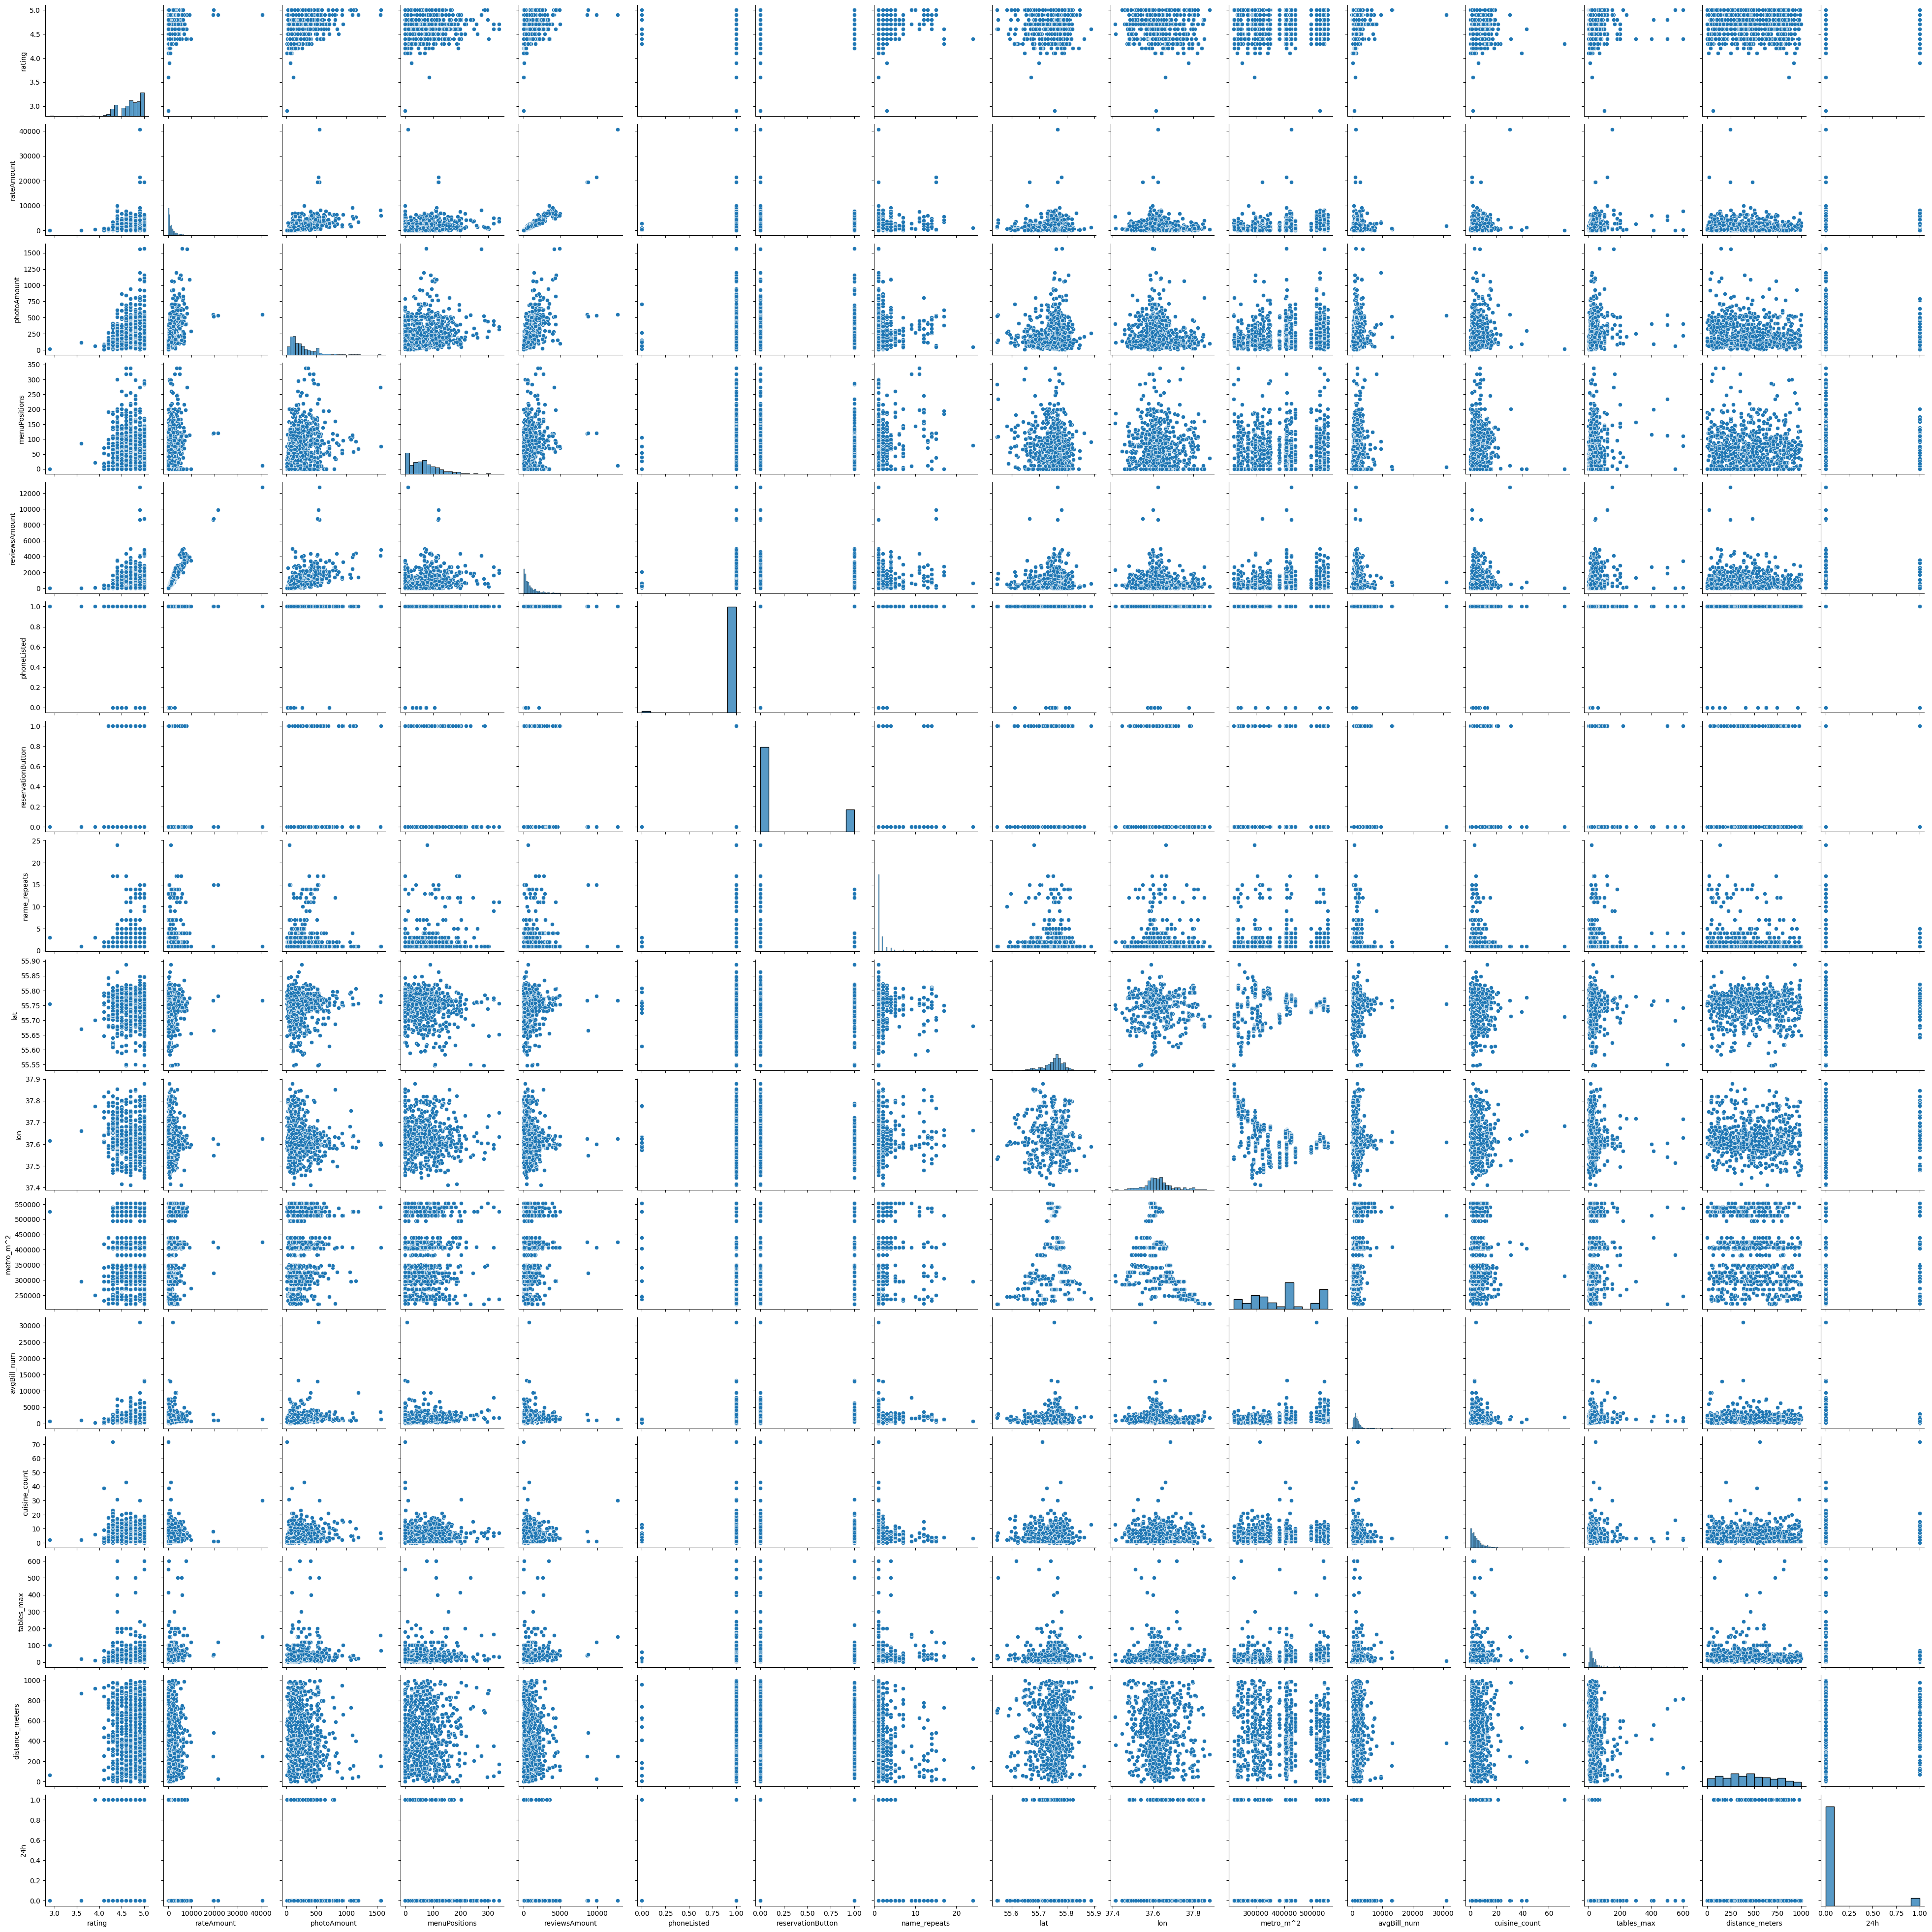

In [72]:
num_df = df.select_dtypes(include=["int64", "float64"])

sns.pairplot(num_df.dropna())
plt.show()

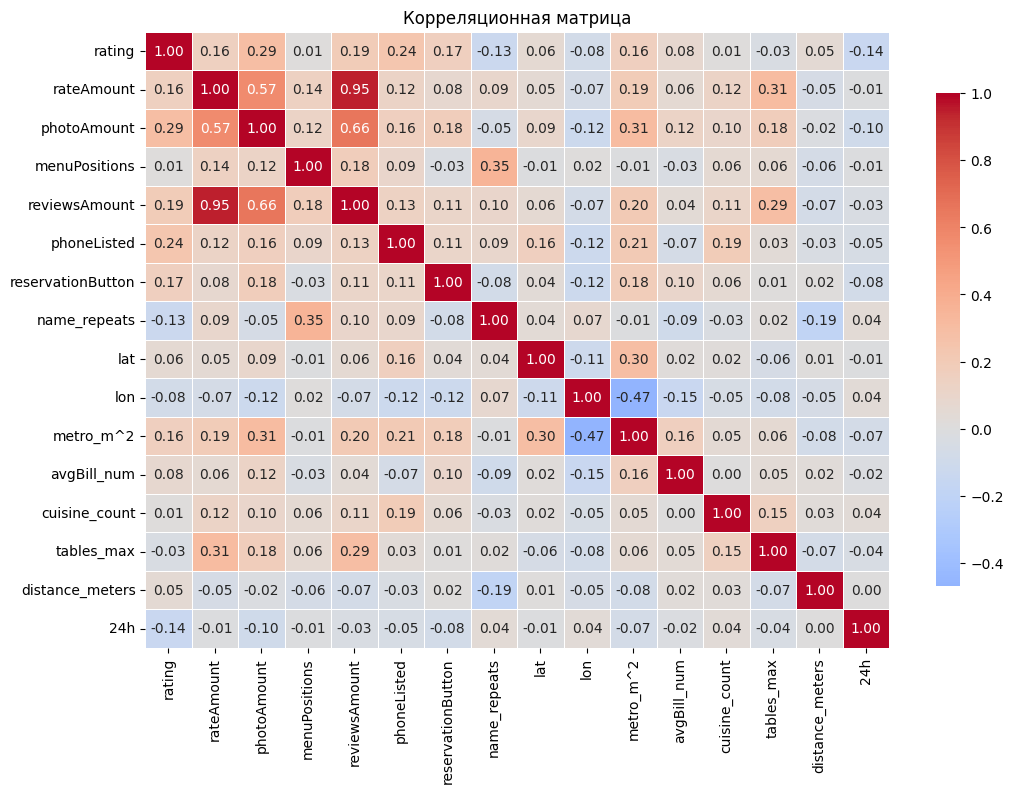

In [53]:
num_df = df.select_dtypes(include=['int64', 'float64'])

corr = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Корреляционная матрица')
plt.show()

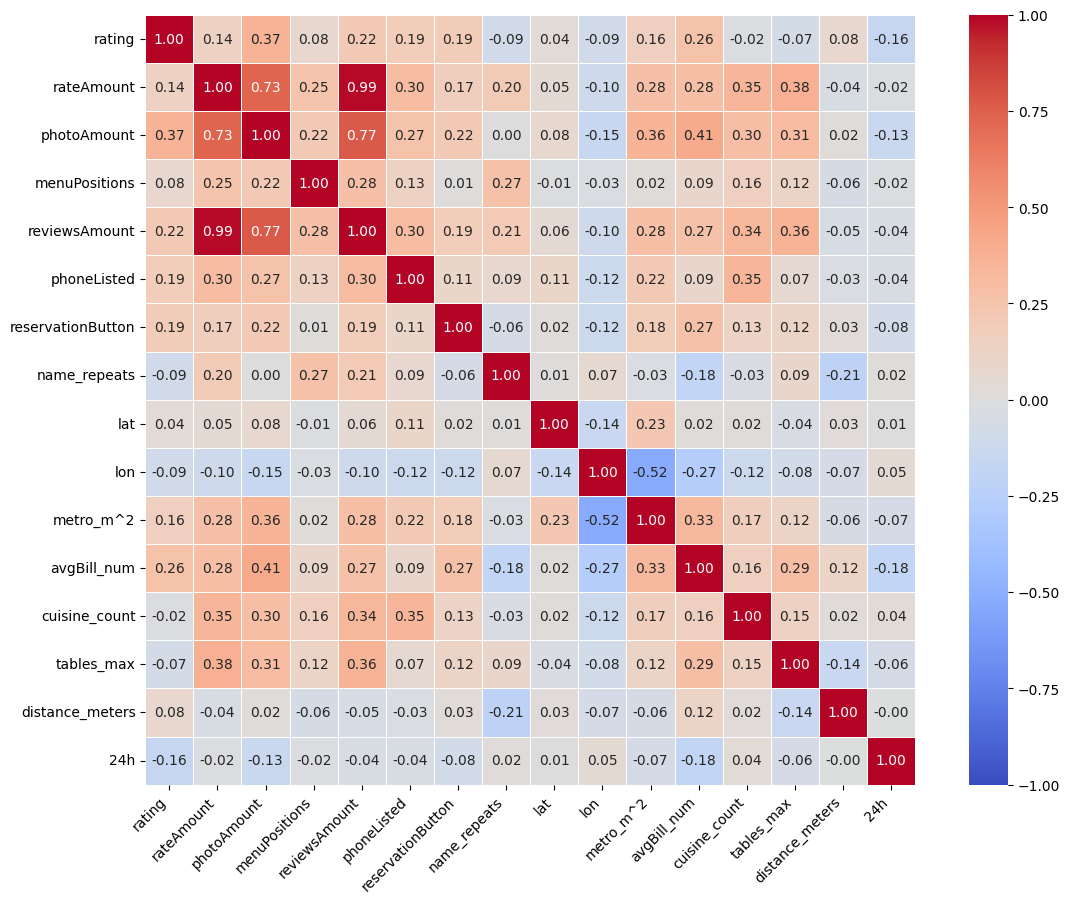

In [76]:
corr = df.select_dtypes(include="number").corr(method="spearman")

plt.figure(figsize=(14, 10))

sns.heatmap(corr, cmap="coolwarm", center=0,
            vmin=-1, vmax=1, annot=True, fmt=".2f",
            linewidths=0.5, square=True)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

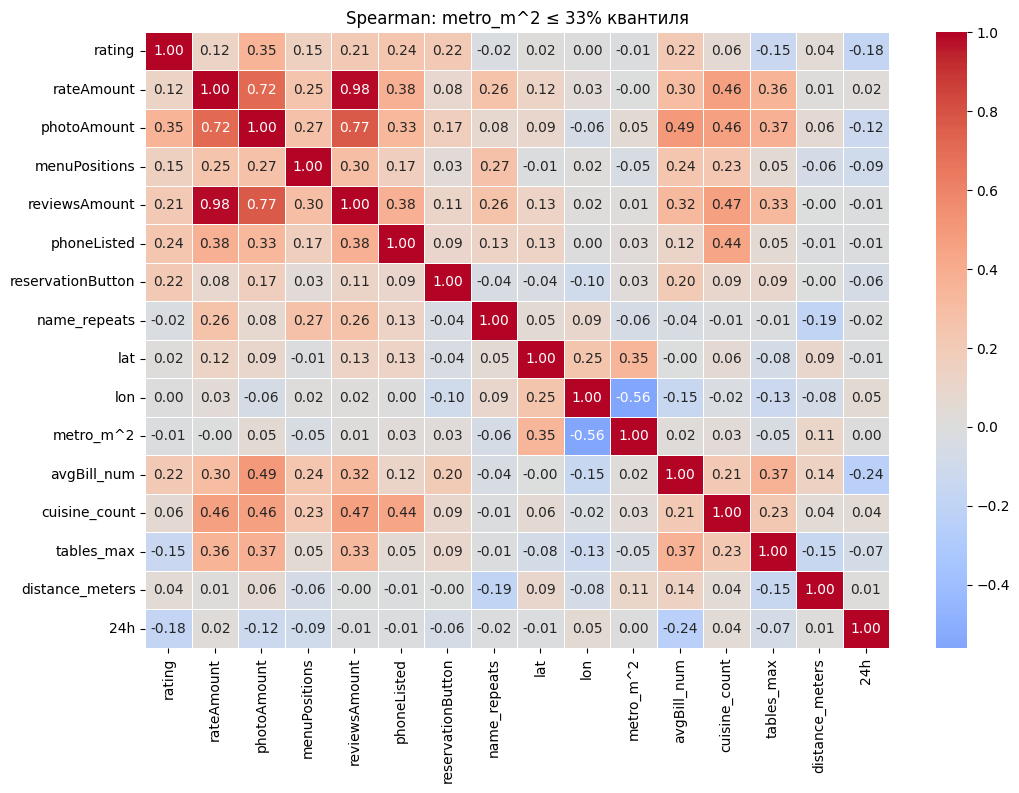

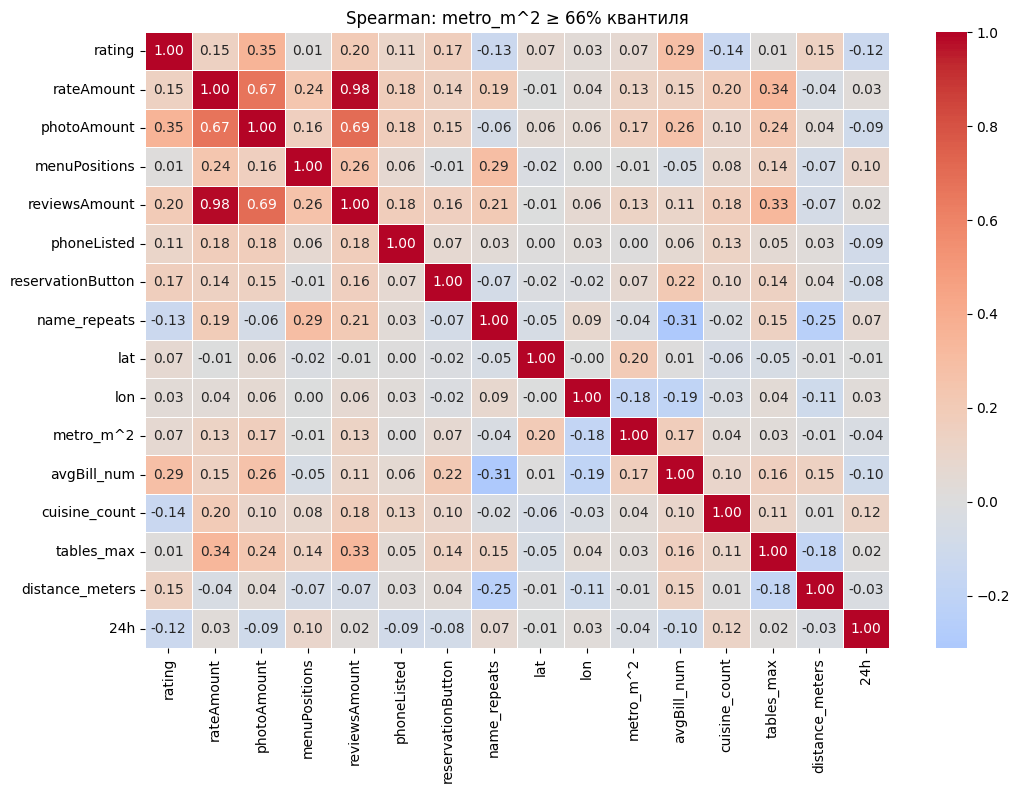

In [79]:
col = "metro_m^2"

q33 = df[col].quantile(0.33)
q66 = df[col].quantile(0.66)

df_lo = df[df[col] <= q33]
df_hi = df[df[col] >= q66]

def spearman_heatmap(data, title):
    num_df = data.select_dtypes(include=["int64", "float64"])
    corr = num_df.corr(method="spearman")

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        corr,
        annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".2f",
        linewidths=0.5,
    )
    plt.title(title)
    plt.show()

spearman_heatmap(df_lo, f"Spearman: {col} ≤ 33% квантиля")
spearman_heatmap(df_hi, f"Spearman: {col} ≥ 66% квантиля")